# NETW 1013 Clustering Project 

**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [4]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.neighbors import NearestNeighbors


from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

In [5]:
# helper function that allows us to display data in 2 dimensions and highlights the clusters
def display_cluster(X,km=[],num_clusters=0, title="Habiba Adel Ahmed Mahmoud Aly", color="deeppink"):
    palette = ['deeppink', 'orangered', 'lightpink', 'palevioletred', 'mediumorchid', 'mediumpurple', 'blueviolet', 'darkviolet', 'magenta', 'mediumvioletred', 'red', 'crimson', 'firebrick', 'plum', 'violet']
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = palette[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = palette[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = palette[i], marker = 'x', s = 100)
    plt.xticks(color=color)
    plt.yticks(color=color)
    plt.title(title, color=color)
    plt.show()

In [6]:
def display_cluster_dbscan(X, km, title, color="deeppink"):
    unique_labels = set(km.labels_)  
    palette = ['deeppink', 'orangered', 'lightpink', 'palevioletred', 'mediumorchid', 'mediumpurple', 'blueviolet', 'darkviolet', 'magenta', 'mediumvioletred', 'red', 'crimson', 'firebrick', 'plum', 'violet']
    for label in unique_labels:
        if label == -1:  # Noise points
            plt.scatter(X[km.labels_ == label, 0], X[km.labels_ == label, 1], 
                        color="black", alpha=0.3, s=20, label="Noise")
        else:
            plt.scatter(X[km.labels_ == label, 0], X[km.labels_ == label, 1], 
                        label=f"Cluster {label}", color=palette[label])
    plt.xticks(color=color)
    plt.yticks(color=color)
    plt.title(title, color=color)
    plt.show()

# Clustering Functions


## Silhouette Plotting fn.

In [12]:
def plot_silhouette (metric, silhouette_scores, xtitle="Silhouette Score Graph"):
    plt.plot(metric, silhouette_scores, marker=r'$\heartsuit$', markersize=12, color='darkviolet', linewidth=1)
    plt.xlabel(xtitle, color='darkviolet', fontsize=12)
    plt.ylabel('Silhouette Score', color='darkviolet', fontsize=12)
    plt.title(f'Silhouette Score vs {xtitle}', color='darkviolet')
    plt.xticks(color='darkviolet')
    plt.yticks(color='darkviolet')
    plt.show()

## Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

In [15]:
def k_means(df,k_range, kmeansplus="false", init = 'k-means++'):
    ssd=[]
    silhouette_scores = []
    km_models = {}
    for k in k_range:
        km = KMeans(n_clusters=k,init=init, random_state=42)
        km.fit(df)
        km_models[k] = km
        ssd.append(km.inertia_)
        
        labels=km.labels_
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)
    return ssd, silhouette_scores, km_models


In [17]:
def plot_ssd (k_range, ssd):
    plt.plot(k_range, ssd, marker=r'$\heartsuit$', markersize=12, color='deeppink', linewidth=1)
    plt.xlabel('Number of Clusters (k)', color='deeppink', fontsize=12)
    plt.ylabel('Sum of Squared Distances (SSD)', color='deeppink', fontsize=12)
    plt.title('Elbow Method', color='deeppink')
    plt.xticks(color='deeppink')
    plt.yticks(color='deeppink')
    plt.show()

## Hierarchal Clustering
* Use AgglomerativeClustering function to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

In [20]:
def hierarchical_clustering_n(df, affinity_list, linkage_list, n_clusters):
    silhouette_scores = []
    models = {}
    best_silhouette = -1
    best_affinity = " "
    best_n = 1
    best_linkage = " "
    for affinity in affinity_list:
         for linkage in linkage_list:
             if linkage == "ward" and affinity != "euclidean":
                 continue
             for n in n_clusters:
                 model = AgglomerativeClustering(n_clusters=n, metric=affinity, linkage=linkage, distance_threshold=None)
                 model = model.fit(df)
                 models[(n,affinity,linkage)] = model
                 silhouette = silhouette_score(df, model.labels_)
                 silhouette_scores.append(silhouette)
                 if silhouette >= best_silhouette:
                     best_n = n
                     best_silhouette = silhouette 
                     best_affinity = affinity
                     best_linkage = linkage
    
    return best_n, best_affinity, best_linkage, best_silhouette, silhouette_scores, models


In [22]:
def hierarchical_clustering_d(df, affinity_list, linkage_list, distance_threshold):
    silhouette_scores = []
    models = {}
    best_silhouette = -1
    best_affinity = " "
    best_n = 1
    best_linkage = " "
    for affinity in affinity_list:
         for linkage in linkage_list:
             if linkage == "ward" and affinity != "euclidean":
                 continue
             for n in distance_threshold:
                 model = AgglomerativeClustering(distance_threshold=n, metric=affinity, linkage=linkage, n_clusters=None)
                 model = model.fit(df)
                 models[(n,affinity,linkage)] = model
                 if len(set(model.labels_)) > 2: 
                     silhouette = silhouette_score(df, model.labels_)
                 else:
                     silhouette = np.nan
                 silhouette_scores.append(silhouette)
                 if silhouette >= best_silhouette:
                     best_n = n
                     best_silhouette = silhouette 
                     best_affinity = affinity
                     best_linkage = linkage
    
    return best_n, best_affinity, best_linkage, best_silhouette, silhouette_scores, models


In [24]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

def plot_dendrogram(df, method="ward"):
    linked = linkage(df, method=method)
    fig, ax = plt.subplots(figsize=(40, 8))
    fig.patch.set_facecolor('white')  
    ax.set_facecolor('white')         
    plt.gcf().set_facecolor('white')  
    dendrogram(linked,  
               color_threshold=0,  
               above_threshold_color='deeppink',
               no_labels=True)
    plt.title(f"Dendrogram using {method} linkage", color='deeppink', fontsize=14, fontweight='bold')
    plt.xlabel("Data Points", color='deeppink', fontsize=12)
    plt.ylabel("Distance", color='deeppink', fontsize=12)
    plt.yticks(color='deeppink')  
    plt.xticks([])  

    plt.grid(False)  
    plt.show()



## DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

In [27]:
def dbscan(df, eps_values, min_samples_values):
    models = {}
    best_score = -1  
    best_eps = None
    best_min_samples = None
    
    for eps in eps_values:
        for min_samples in min_samples_values:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
            cluster_labels = dbscan.fit_predict(df)
            labels = dbscan.labels_
            num_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
            
            if num_clusters > 1:  
                score = silhouette_score(df, labels)
                if score > best_score:
                    best_score = score
                    best_eps = eps
                    best_min_samples = min_samples
            
            models[(eps, min_samples)] = dbscan  
    return models, best_eps, best_min_samples


In [29]:
def dbscan_eps (df, eps_values, min_sample):
    silhouette_scores=[]
    models={}
    for eps in eps_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)  
        cluster_labels = dbscan.fit_predict(df)
        labels = dbscan.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
        if num_clusters > 1:
            score = silhouette_score(df, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(np.nan)
        models[eps] = dbscan
    return models, silhouette_scores

In [31]:
def dbscan_min_samples (df, min_samples_values, eps):
    silhouette_scores=[]
    models={}
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)  
        cluster_labels = dbscan.fit_predict(df)
        labels = dbscan.labels_
        num_clusters = len(set(labels)) - (1 if -1 in labels else 0) 
        if num_clusters > 1:
            score = silhouette_score(df, labels)
            silhouette_scores.append(score)
        else:
            silhouette_scores.append(np.nan)
        models[min_samples] = dbscan
    return models, silhouette_scores

In [33]:
def plot_kdistance (df, k_value):
    nbrs = NearestNeighbors(n_neighbors=k_value).fit(df)
    distances, indices = nbrs.kneighbors(df)
    k_distances = np.sort(distances[:, k_value-1])  # k-1 because Python indexing starts from 0

    plt.figure(figsize=(8, 5))
    plt.plot(k_distances, marker=r'$\heartsuit$', markersize=12, color='violet', linewidth=1)
    plt.xlabel("Sorted Points", color='violet', fontsize=12)
    plt.ylabel(f"{k_value}-Distance", color='violet', fontsize=12)
    plt.title(f"{k_value}-Distance Graph for DBSCAN", color='violet')
    plt.xticks(color='violet')
    plt.yticks(color='violet')
    plt.show()


In [35]:
def metricVSoutliers (scaled_df, metrics, models, xtitle="Epsilon"):
    
    outlier_percent = []
    for key, m in models.items():
        
        cluster_labels = m.fit_predict(scaled_df)
        perc_outliers = 100 * np.sum(cluster_labels == -1) / len(cluster_labels)
        outlier_percent.append(perc_outliers)    
    
    plt.plot(metrics, outlier_percent, marker=r'$\heartsuit$', markersize=12, color='magenta', linewidth=1)
    plt.xlabel(f"{xtitle}", color='magenta', fontsize=12)
    plt.ylabel("Percentage of Outliers", color='magenta', fontsize=12)
    plt.title(f"Effect of {xtitle} on Outlier Percentage in DBSCAN", color='magenta')
    plt.xticks(color='magenta')
    plt.yticks(color='magenta')
    plt.show()

# Datasets

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



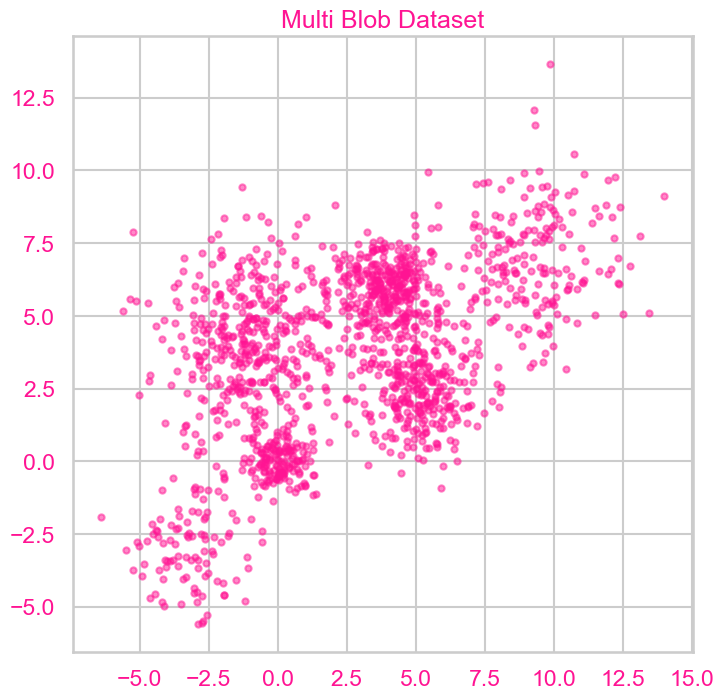

In [39]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
Multi_blob_Data = StandardScaler().fit_transform(Multi_blob)
display_cluster(Multi_blob, title="Multi Blob Dataset")

### K Means for Multi-blob dataset

In [42]:
k_range = np.arange(2,10)

In [44]:
ssd, silhouette_scores, km_models = k_means(Multi_blob_Data, k_range) #calls k_means fn. with init=kmeans++ 

In [46]:
kmean_silhouette = np.argmax(silhouette_scores)
best_k = k_range[kmean_silhouette]
best_silhouette = silhouette_scores[kmean_silhouette]
print(f"The best sillouette is for {best_k} clusters is: {best_silhouette}")

The best sillouette is for 6 clusters is: 0.4861099840323075


In [48]:
ssd_rand, silhouette_scores_rand, km_models_rand = k_means(Multi_blob_Data, k_range, init="random")

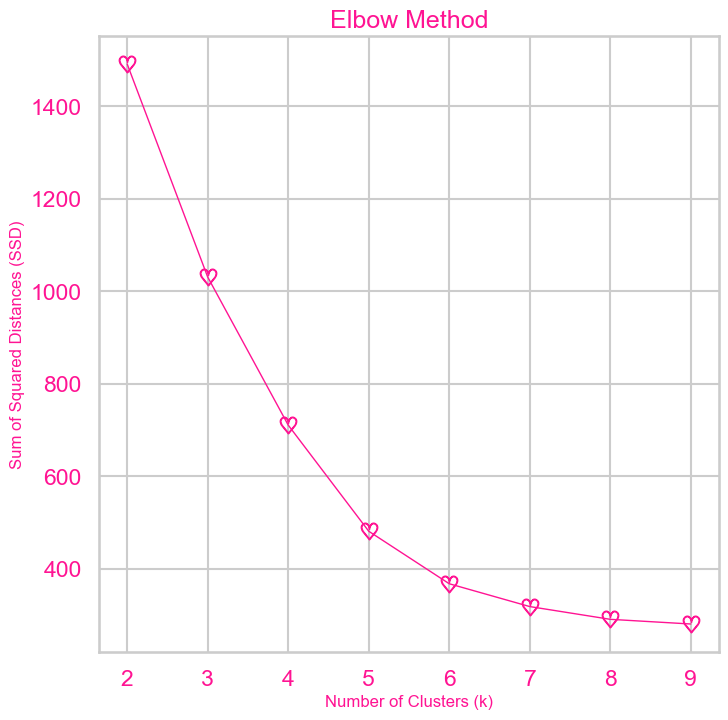

In [49]:
plot_ssd(k_range,ssd)

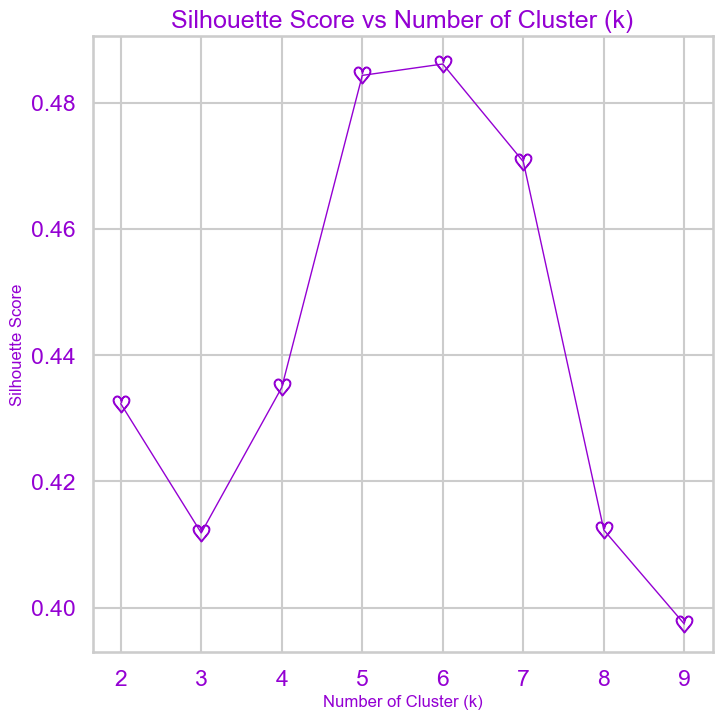

In [50]:
plot_silhouette(k_range,silhouette_scores,"Number of Cluster (k)")

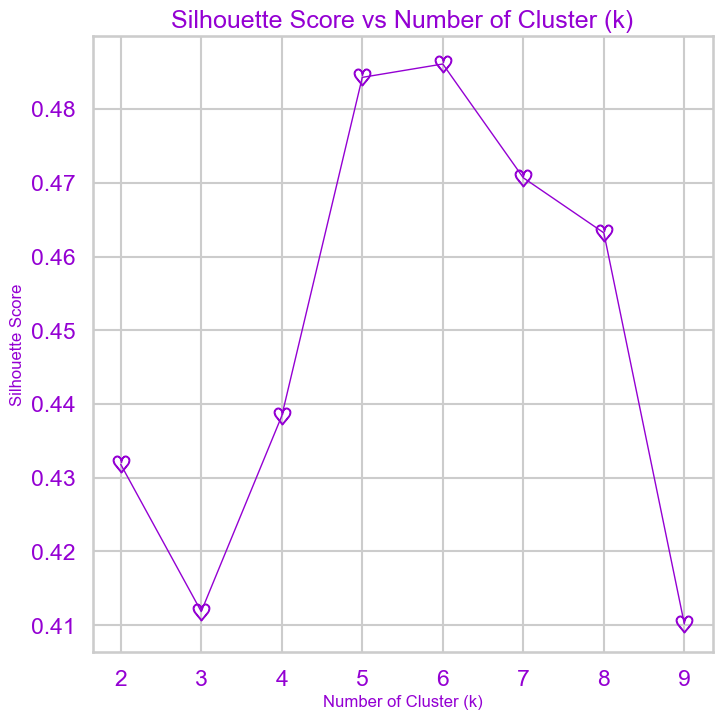

In [51]:
plot_silhouette(k_range,silhouette_scores_rand,"Number of Cluster (k)")

The **elbow** point occurs at **k = 6**, where the SSD stops decreasing rapidly, and it also achieves the **best silhouette score**, making it the optimal number of clusters.

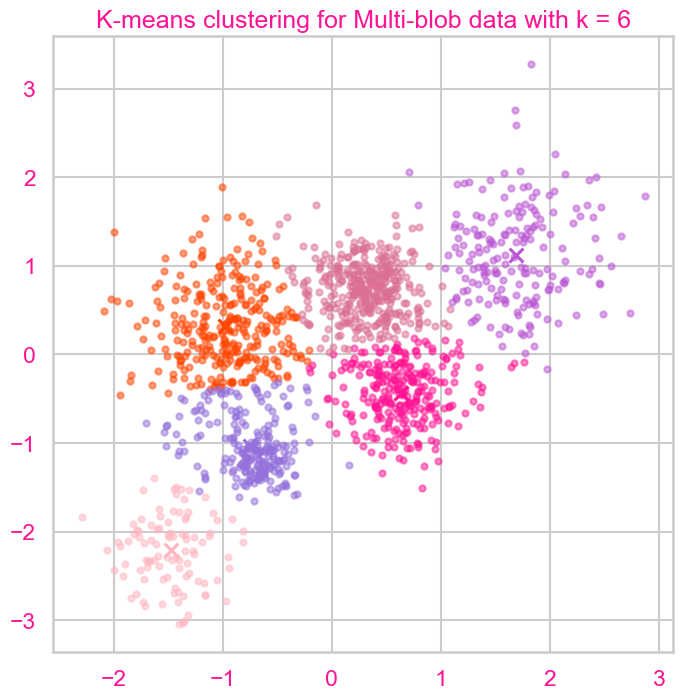

In [53]:
display_cluster(Multi_blob_Data, km=km_models[6], num_clusters=6, title= f"K-means clustering for Multi-blob data with k = 6")

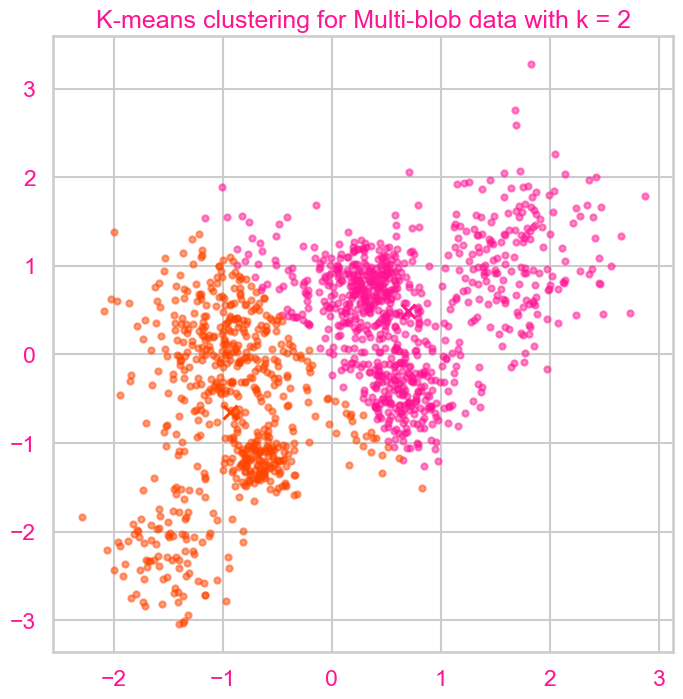

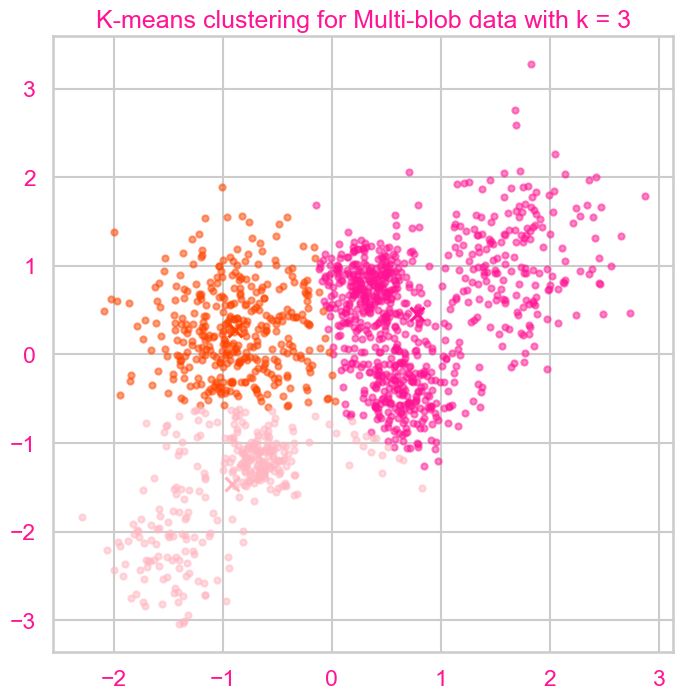

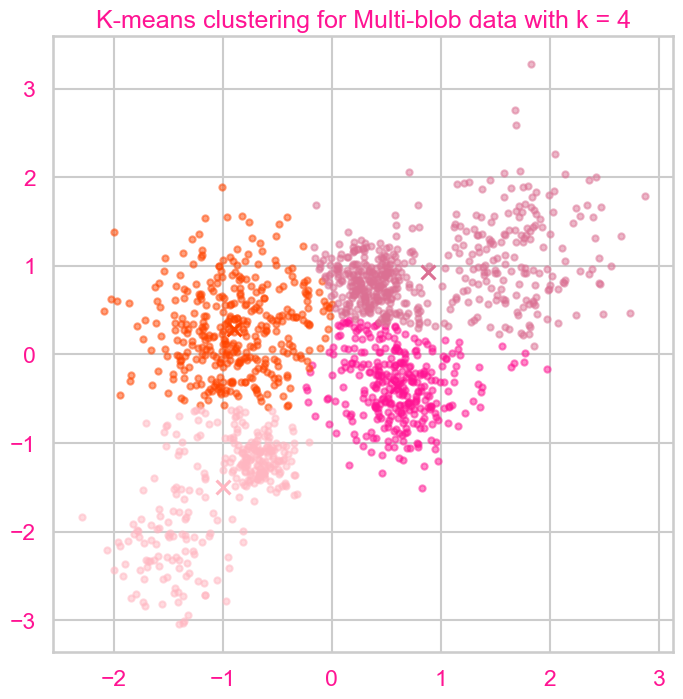

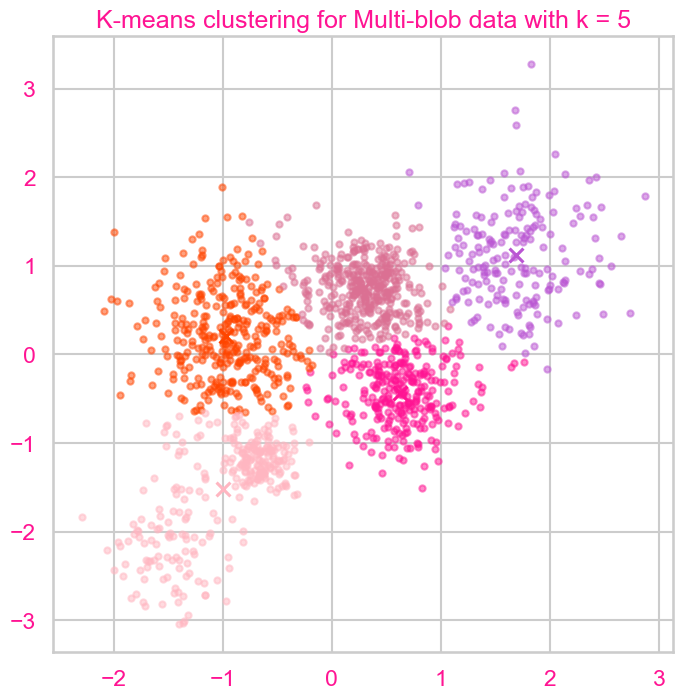

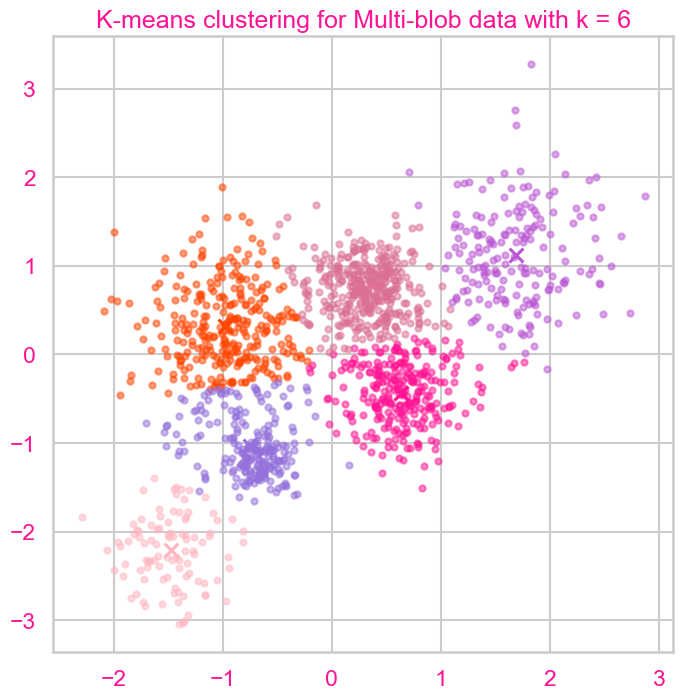

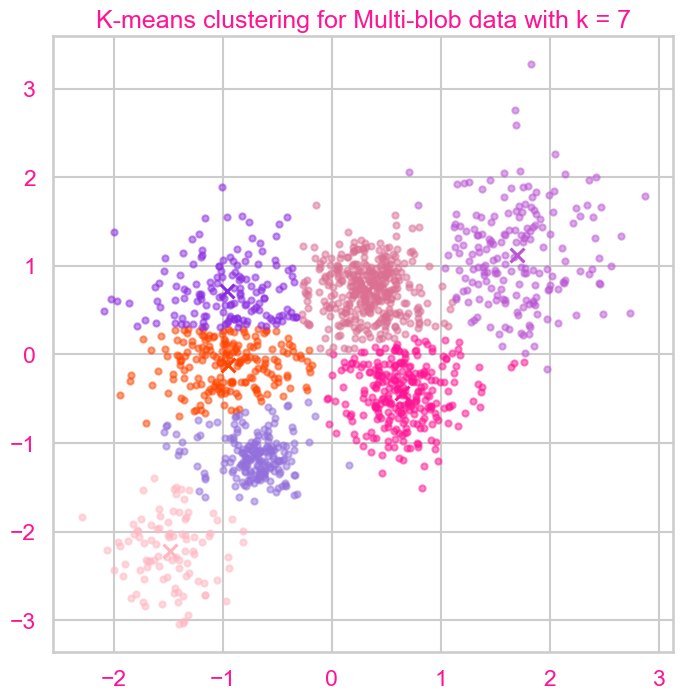

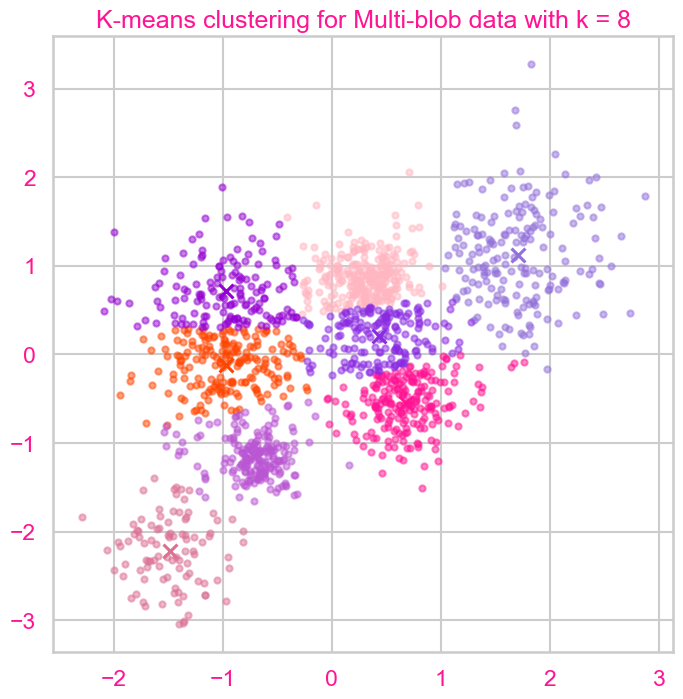

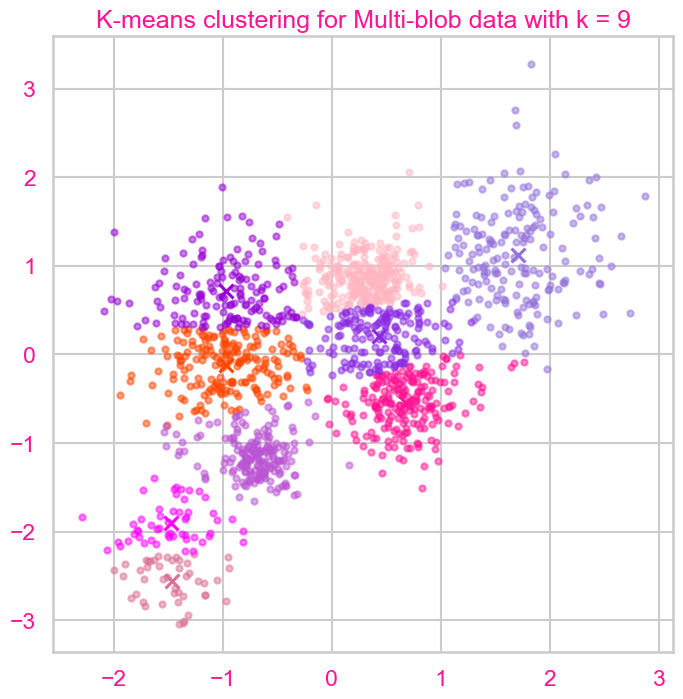

In [54]:
for k in k_range:
    display_cluster(Multi_blob_Data, km=km_models[k], num_clusters=k, title= f"K-means clustering for Multi-blob data with k = {k}")

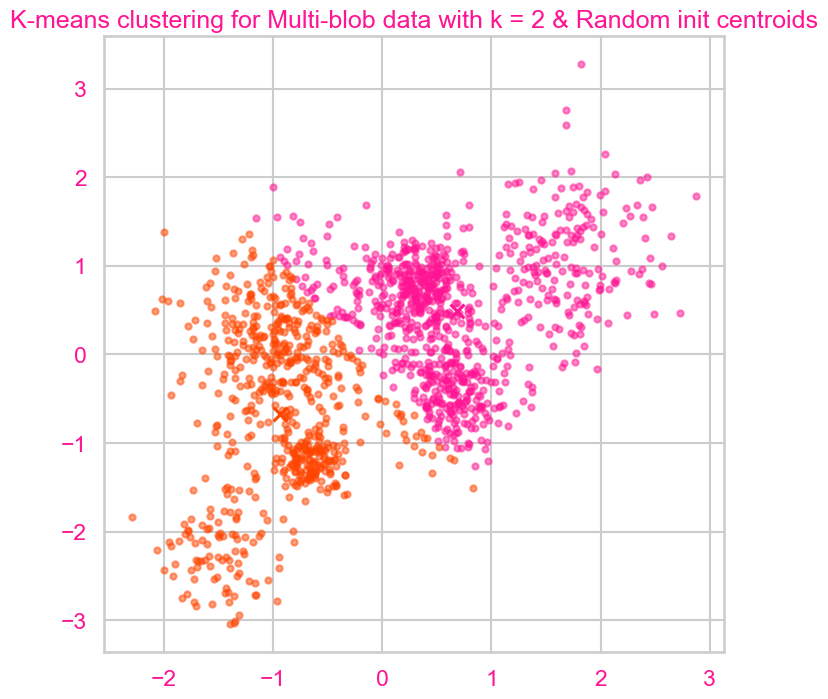

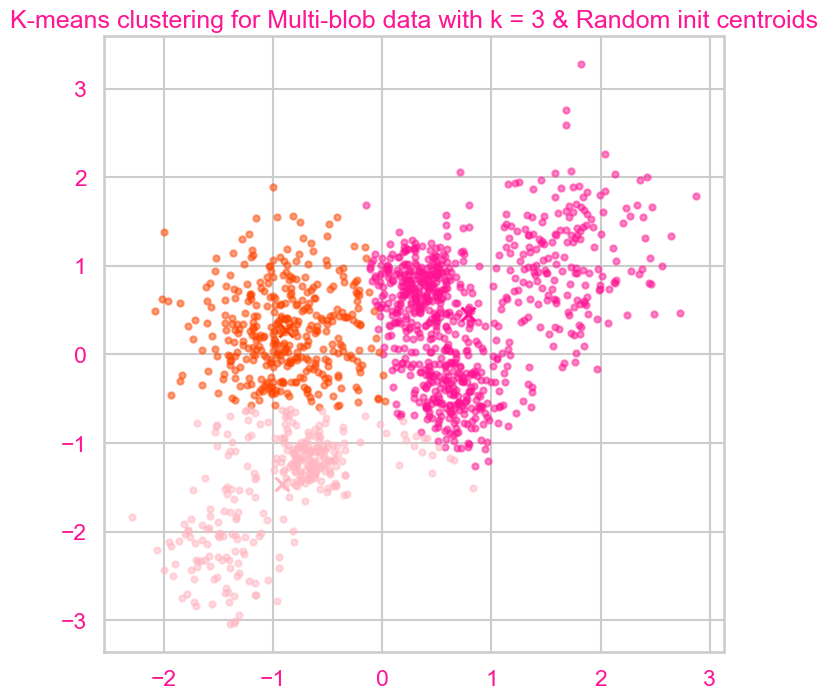

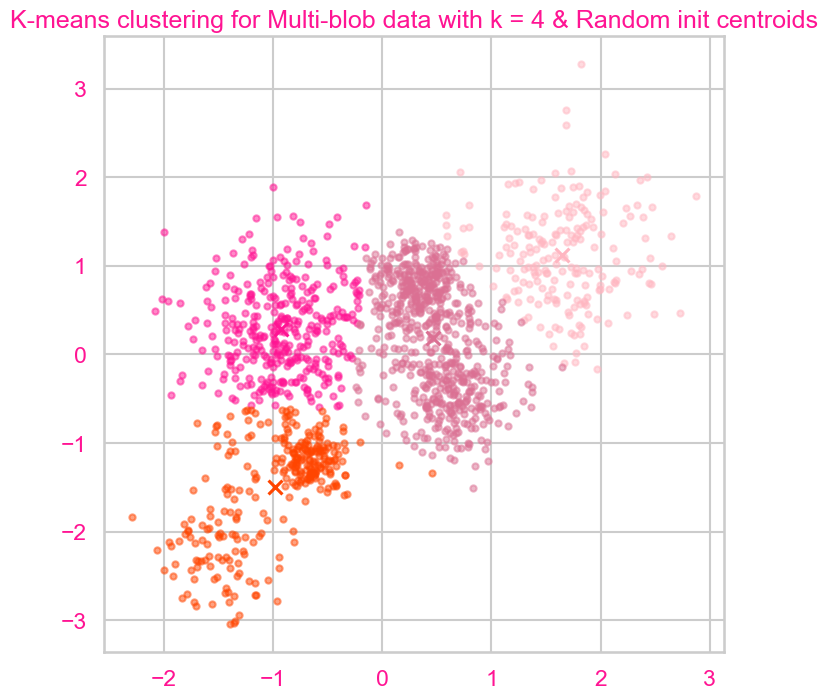

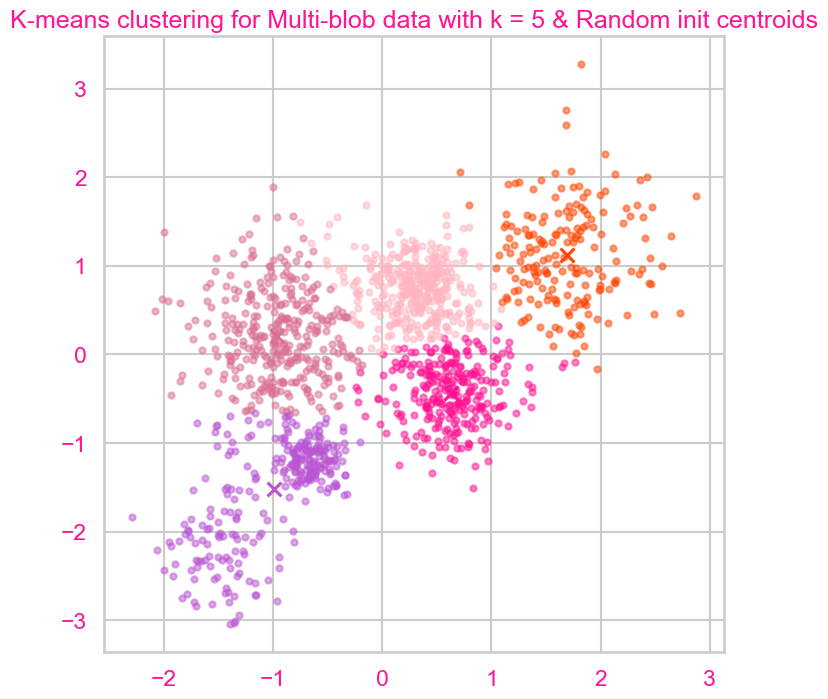

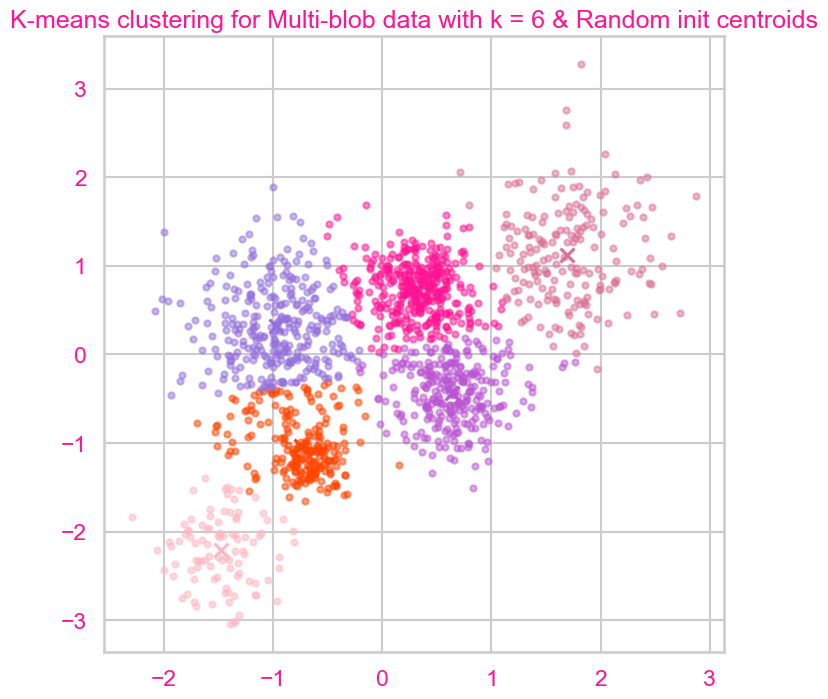

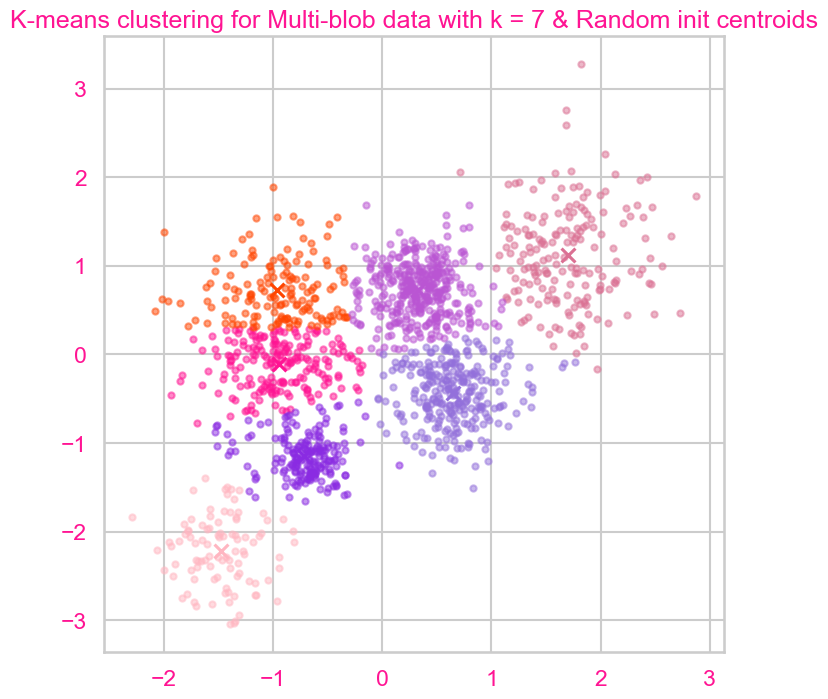

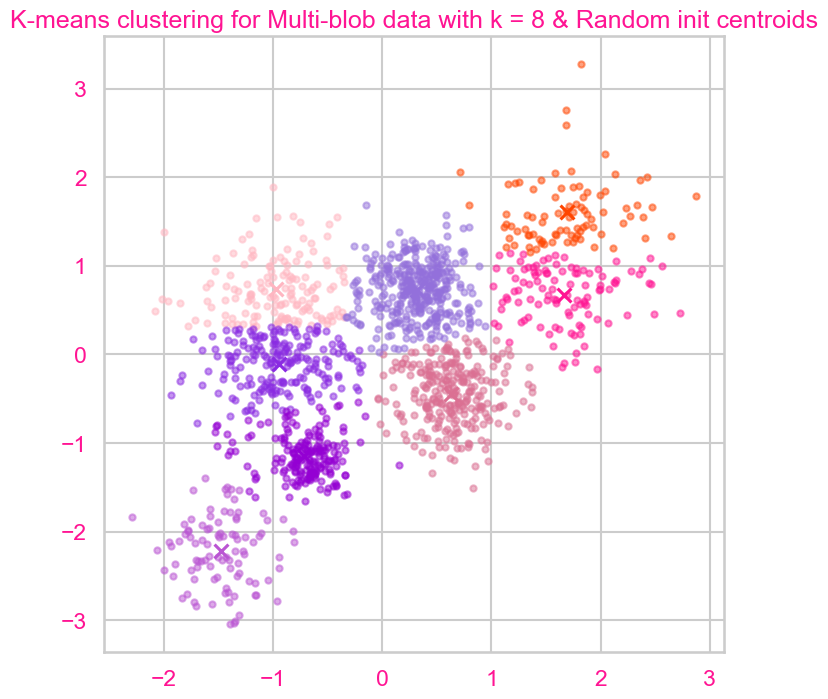

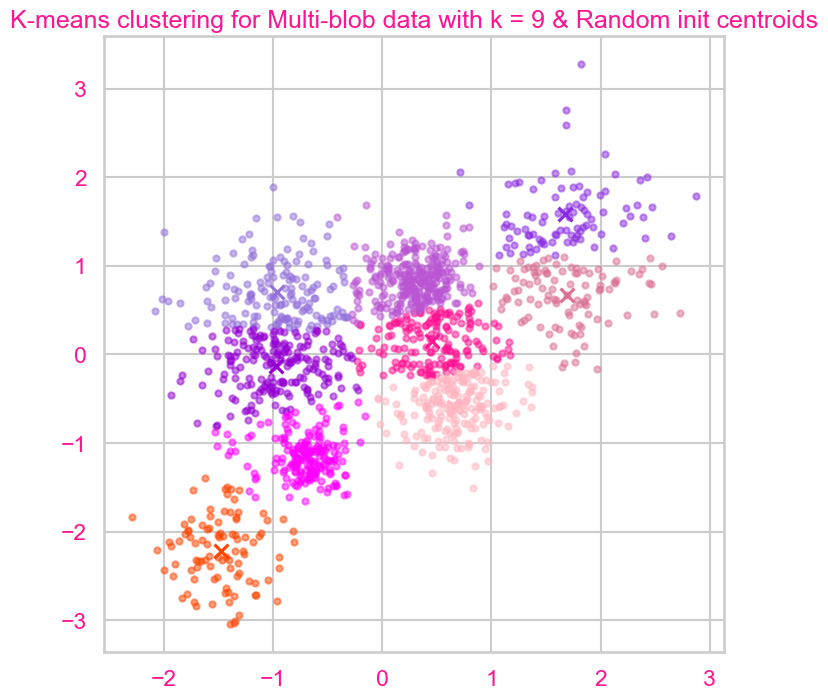

In [55]:
for k in k_range:
    display_cluster(Multi_blob_Data, km=km_models_rand[k], num_clusters=k, title= f"K-means clustering for Multi-blob data with k = {k} & Random init centroids")

### DBSCAN for Multi-blob dataset

In [64]:
eps_values = np.linspace(0.1, 3, 50)
min_samples_values = np.arange(5,25)
models, best_eps, best_min_samples = dbscan(Multi_blob_Data,eps_values,min_samples_values) #This function loops over eps and min_samples creating a series of models

In [66]:
print(f"The best epsilon is {best_eps} and best minimum samples is {best_min_samples} according to silhouette score")

The best epsilon is 0.27755102040816326 and best minimum samples is 14 according to silhouette score


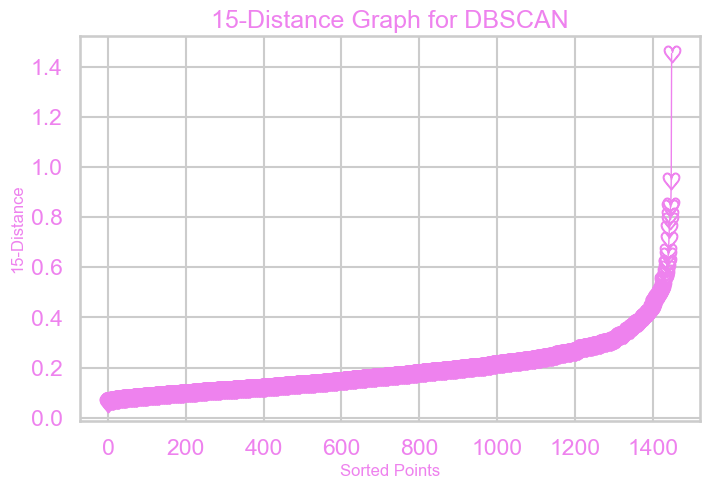

In [68]:
plot_kdistance(Multi_blob_Data,15)

In [72]:
eps_value = 0.27
models_min_sample, silhouette_min_sample = dbscan_min_samples(Multi_blob_Data, min_samples_values, eps_value) #This function loops over only minimum samples 

In [74]:
min_sample = 14
models_eps, silhouette_eps = dbscan_eps(Multi_blob_Data, eps_values, min_sample) #This function loops over only eps 

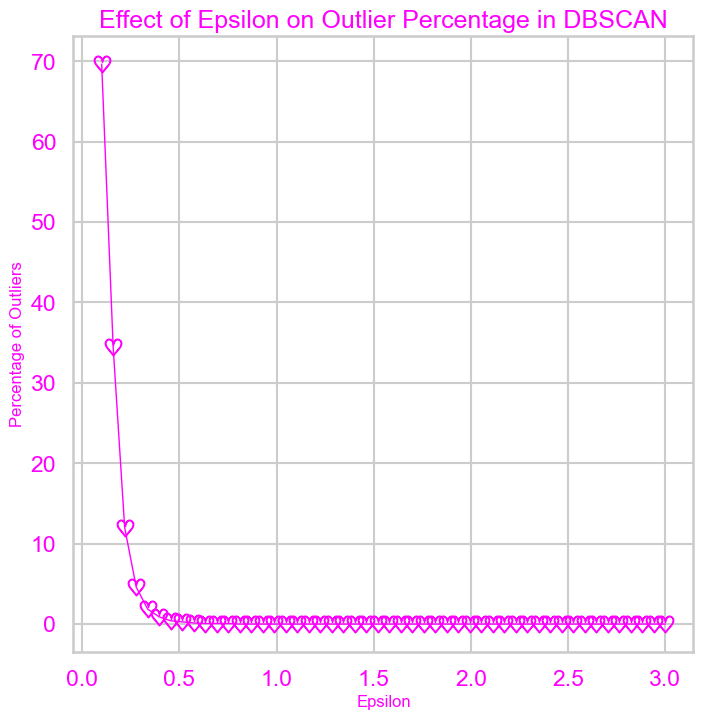

In [76]:
metricVSoutliers (Multi_blob_Data, eps_values, models_eps, xtitle="Epsilon")

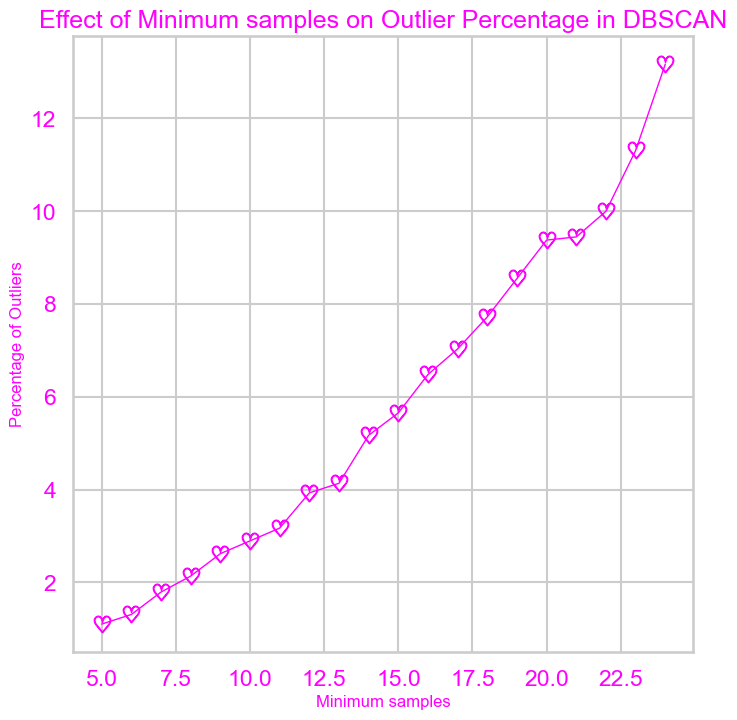

In [77]:
metricVSoutliers (Multi_blob_Data, min_samples_values, models_min_sample, xtitle="Minimum samples")

Based on the outlier graphs:
The minimum samples should not exceed 10 to keep the percentage of outliers below 5%.
The epsilon (eps) should be greater than 1 to ensure that the percentage of outliers remains low.

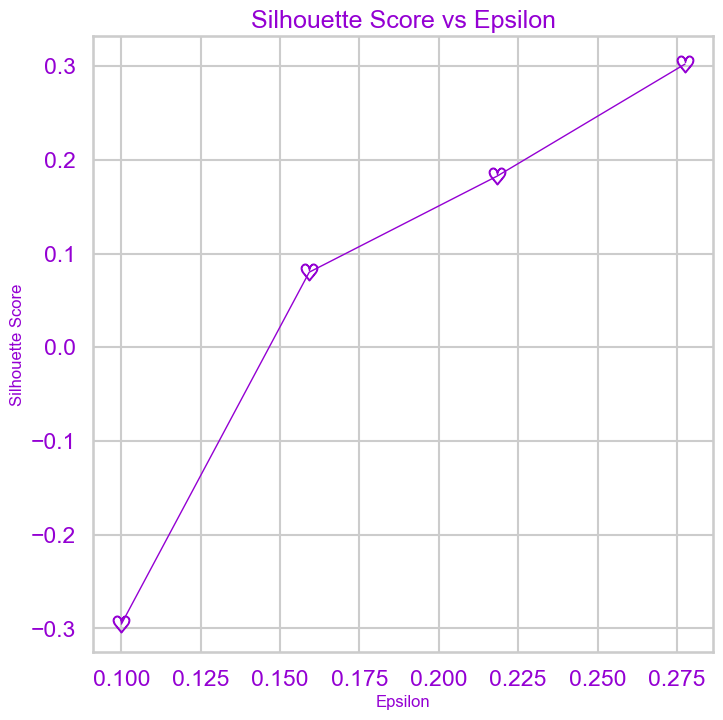

In [80]:
plot_silhouette(eps_values,silhouette_eps, "Epsilon")

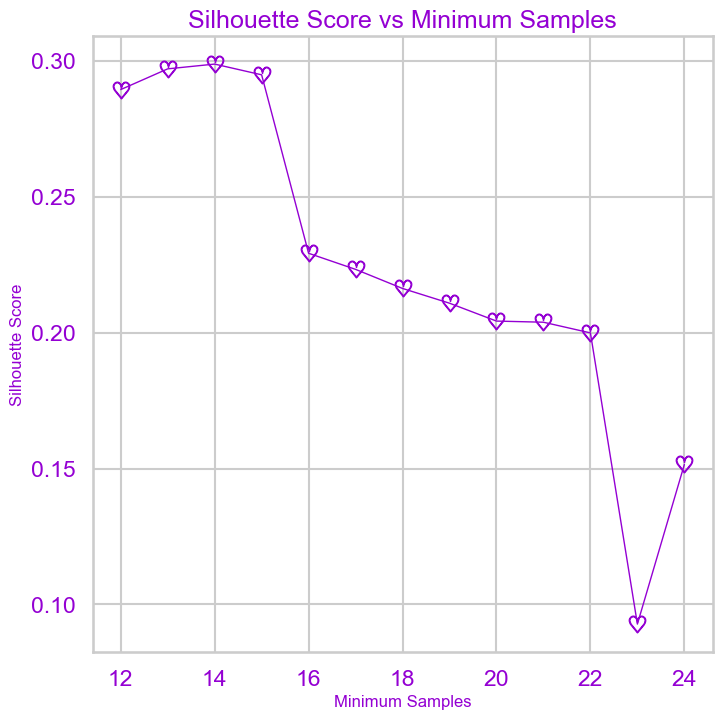

In [82]:
plot_silhouette(min_samples_values,silhouette_min_sample, "Minimum Samples")

In [89]:
test_eps = min(eps_values, key=lambda x: abs(x - eps_value))
test_model = models.get((test_eps, min_sample))

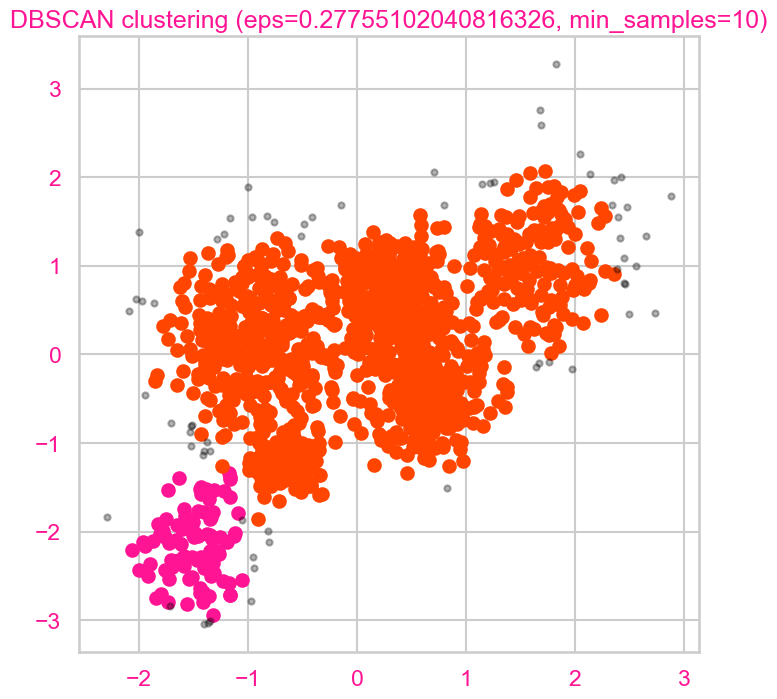

In [91]:
display_cluster_dbscan(Multi_blob_Data, km=test_model, title=f"DBSCAN clustering (eps={test_eps}, min_samples={test_min_sample})")

### Hierarchical Clustering for Multi-blob dataset

In [94]:
affinities = ["euclidean", "manhattan", "cosine"]
linkages = ["complete", "average", "single"]
n_clusters = np.arange(2,7)

best_n, best_affinity, best_linkage, best_silhouette, silhouette_scores, models = hierarchical_clustering_n(Multi_blob_Data, affinities, linkages, n_clusters)

In [96]:
print(f"Best agglomerative clustering model for this data where number of clusters is {best_n} with linkage of {best_linkage} and affinity of {best_affinity}. "
      f"Silhouette Score is {best_silhouette}.")

Best agglomerative clustering model for this data where number of clusters is 2 with linkage of average and affinity of cosine. Silhouette Score is 0.423606851876823.


In [98]:
distance_threshold = np.arange(0.5, 1.5, 0.4)
best_d, best_affinity_d, best_linkage_d, best_silhouette_d, silhouette_scores_d, models_d = hierarchical_clustering_d(Multi_blob_Data, affinities, linkages, distance_threshold)

In [100]:
print(f"Best agglomerative clustering model for this data where the minimum distance between clusters is {best_d} with linkage of {best_linkage_d} and affinity of {best_affinity_d}. "
      f"Silhouette Score is {best_silhouette_d}.")

Best agglomerative clustering model for this data where the minimum distance between clusters is 1.3 with linkage of average and affinity of manhattan. Silhouette Score is 0.4149843810191931.


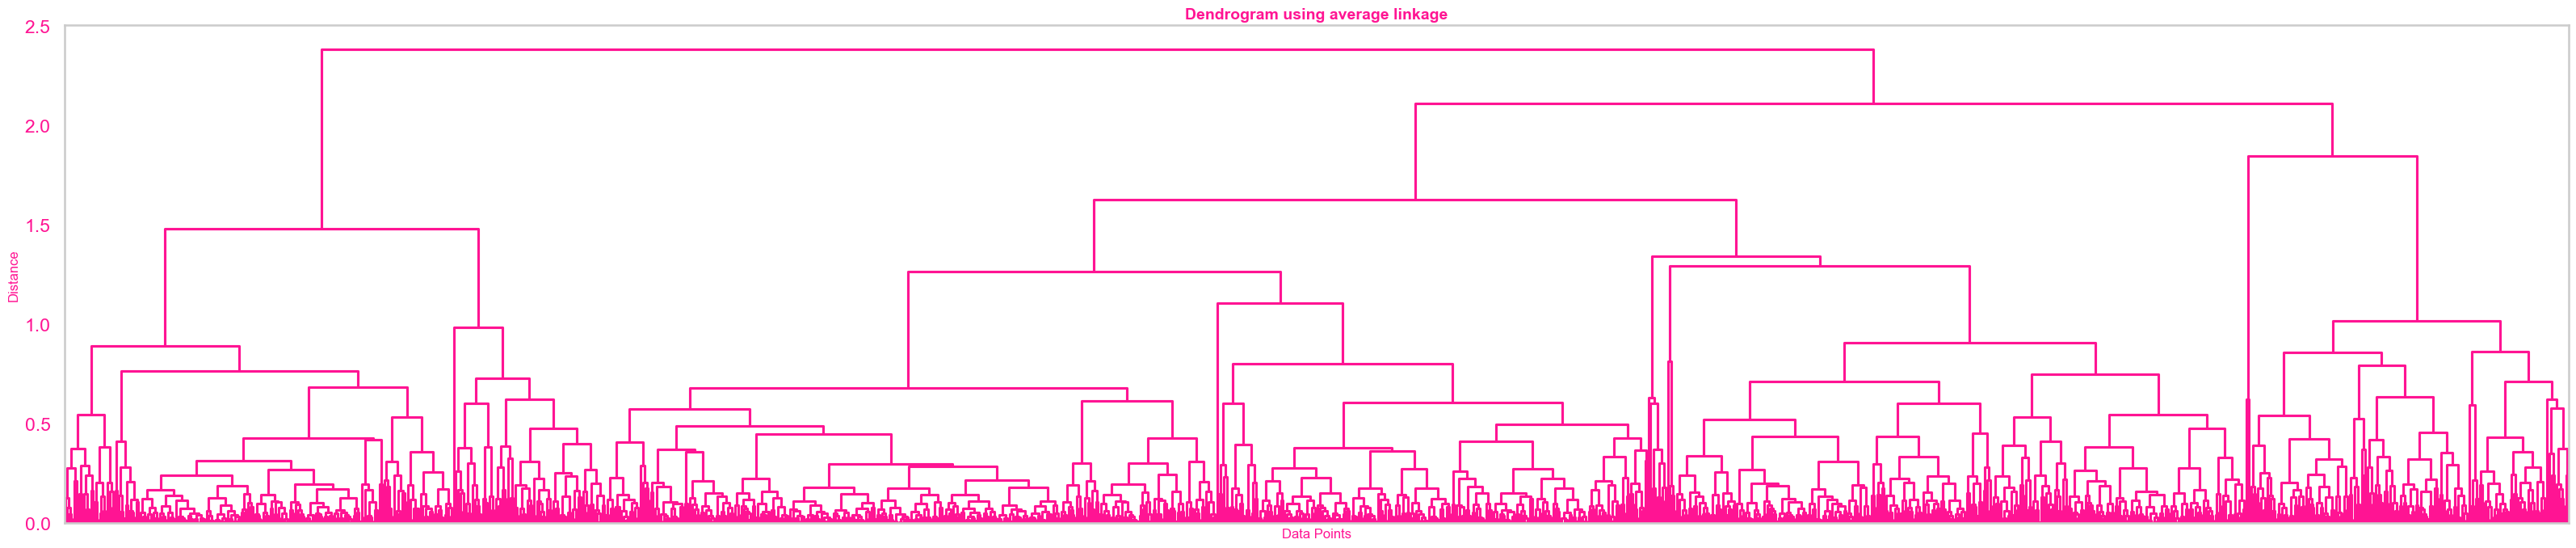

In [102]:
plot_dendrogram(Multi_blob_Data, "average")

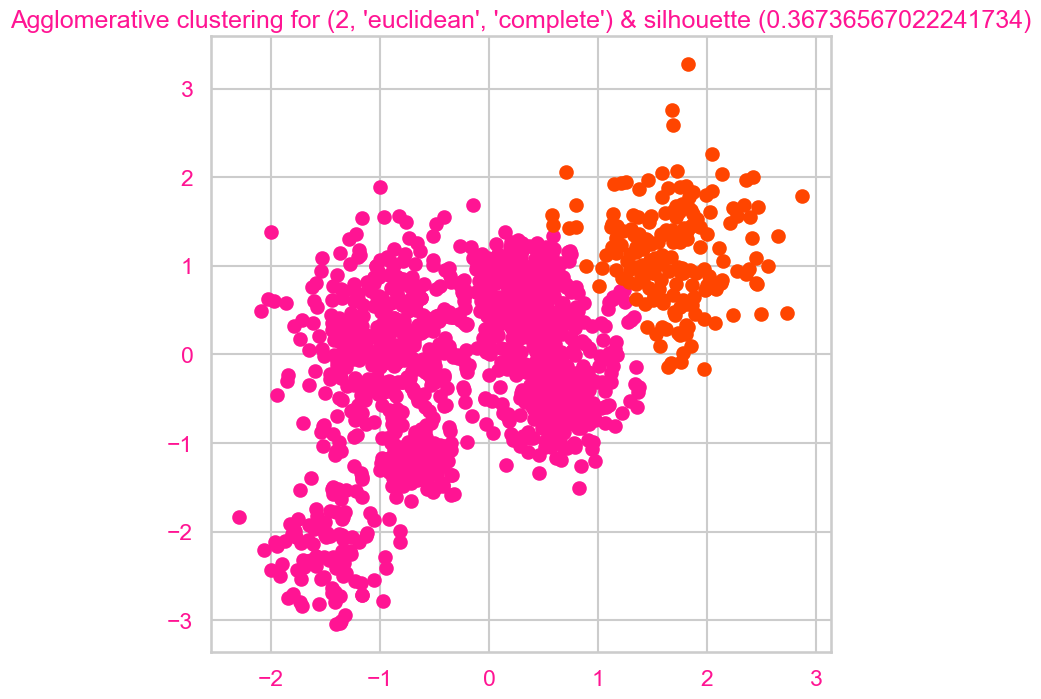

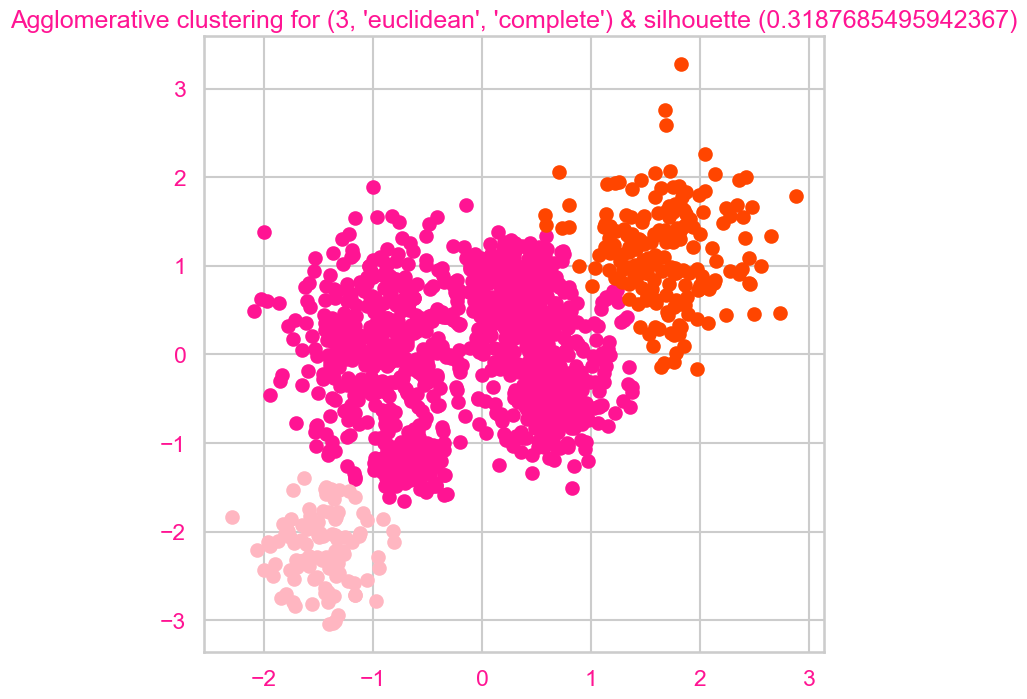

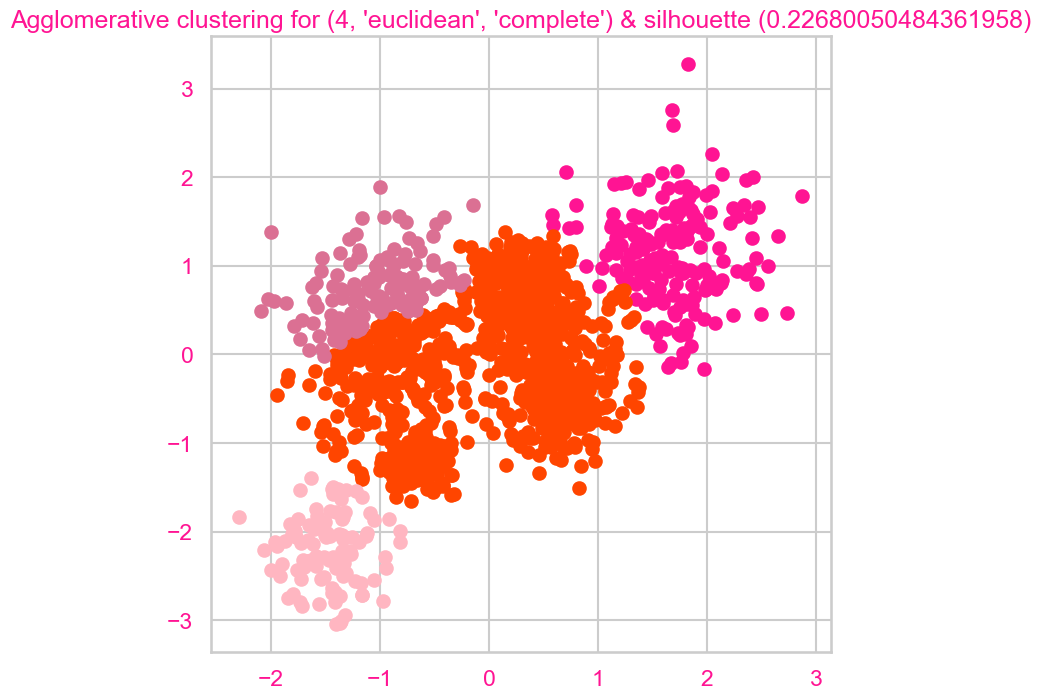

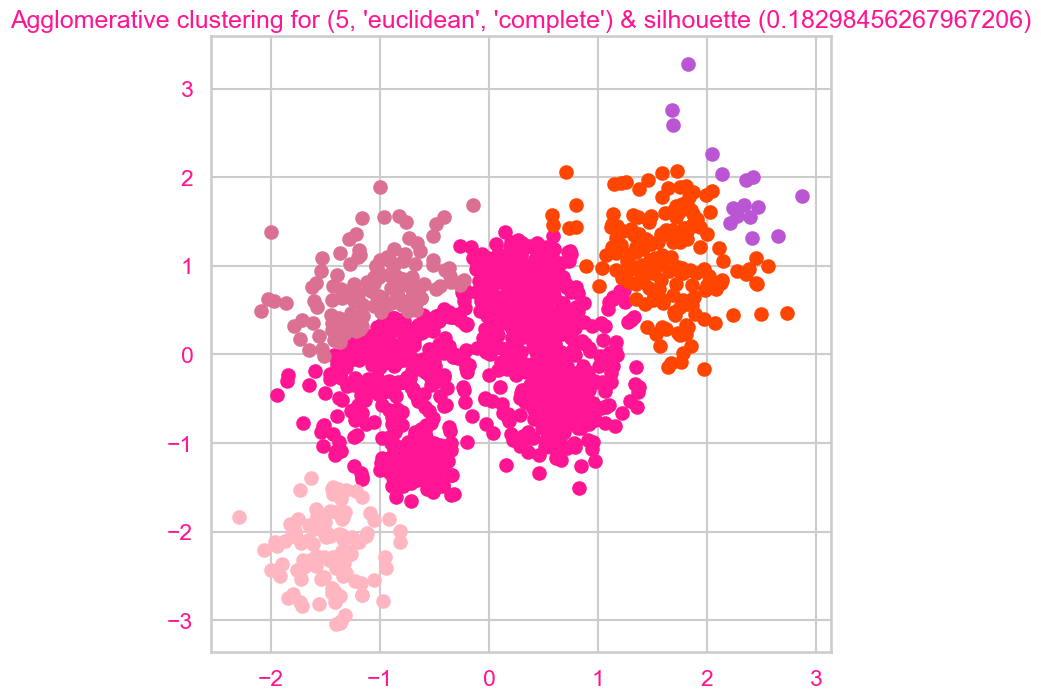

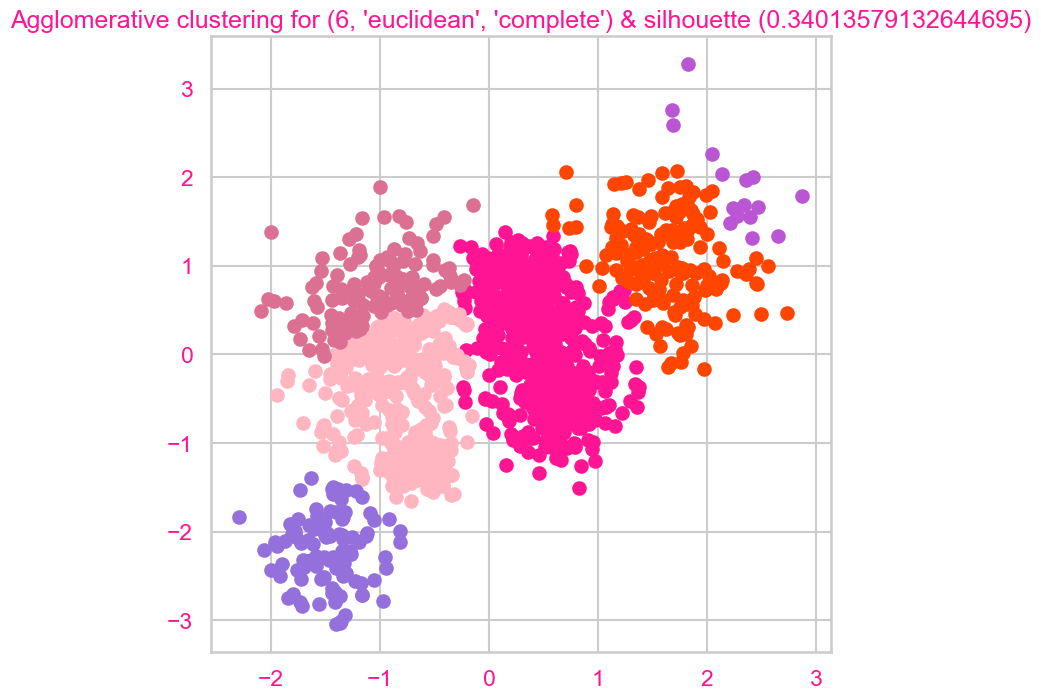

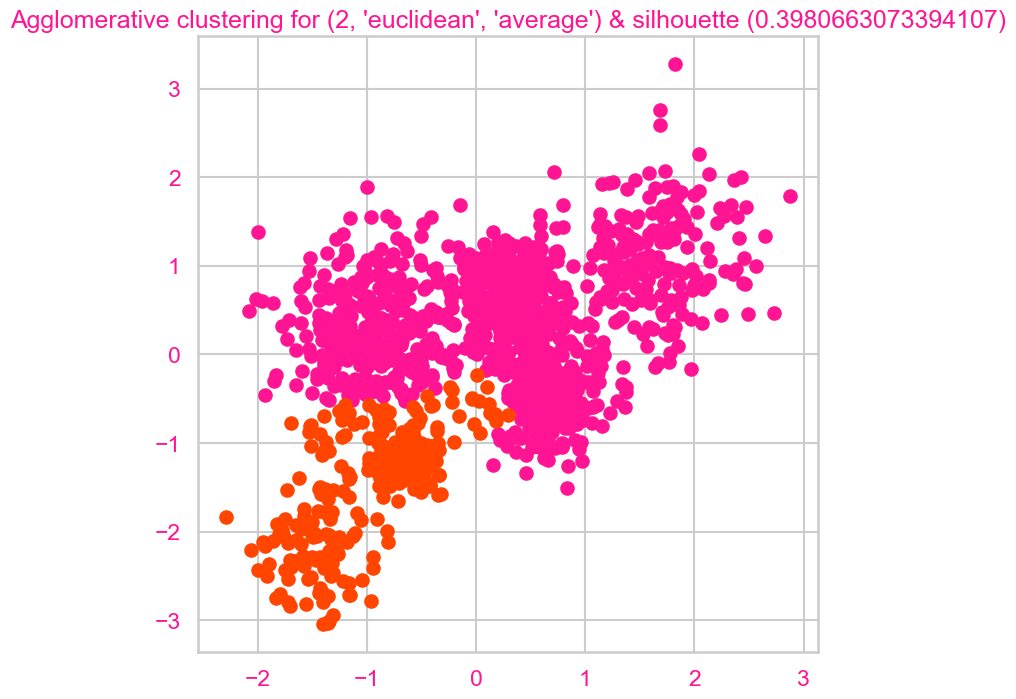

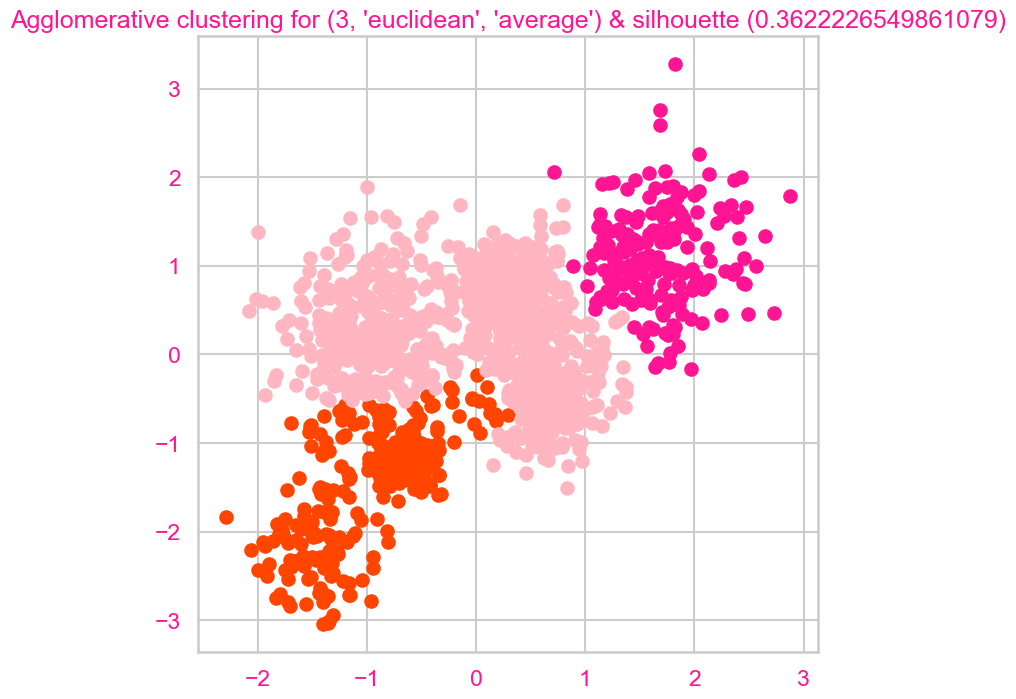

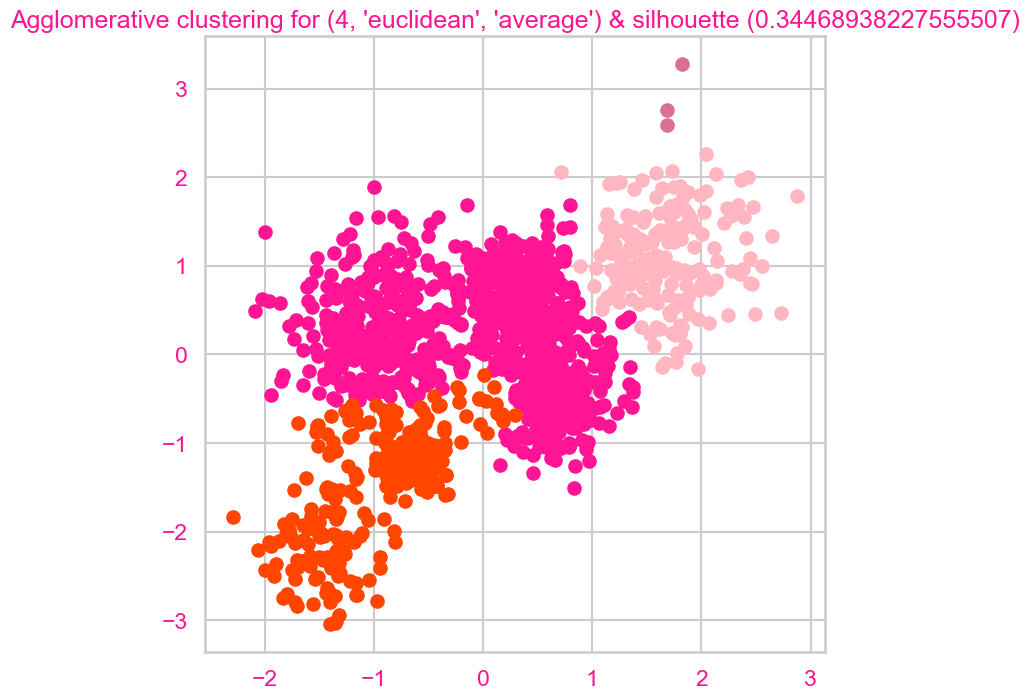

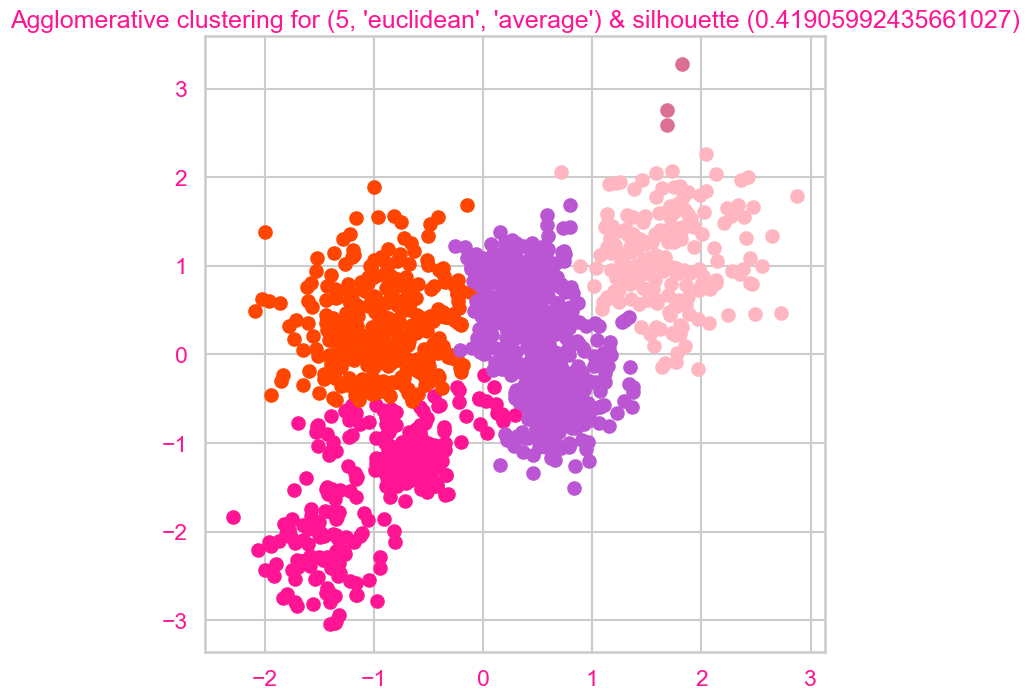

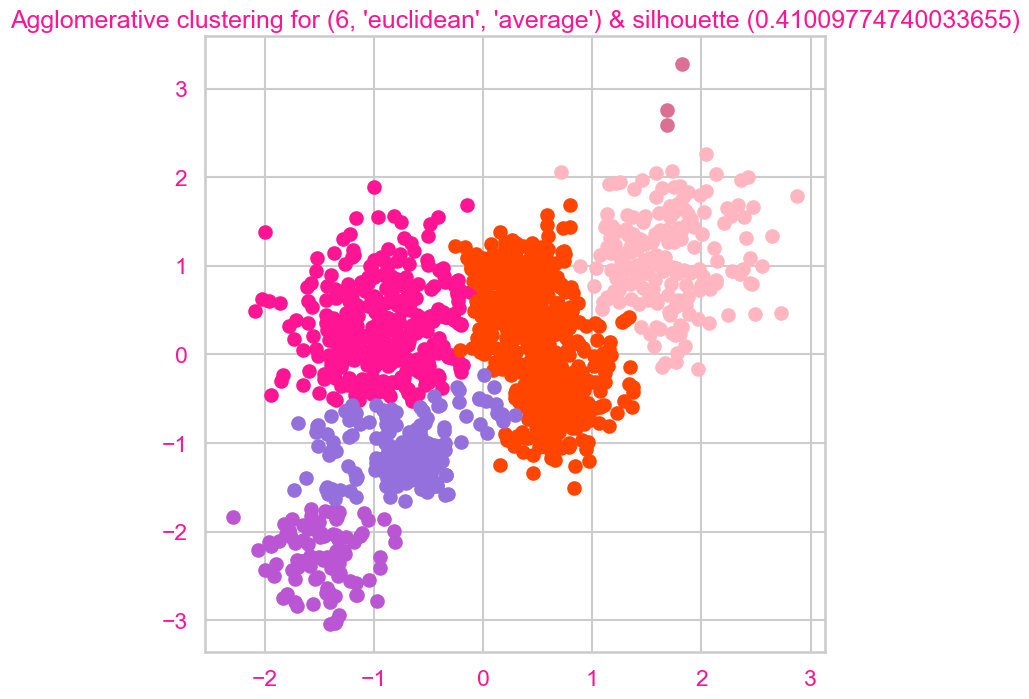

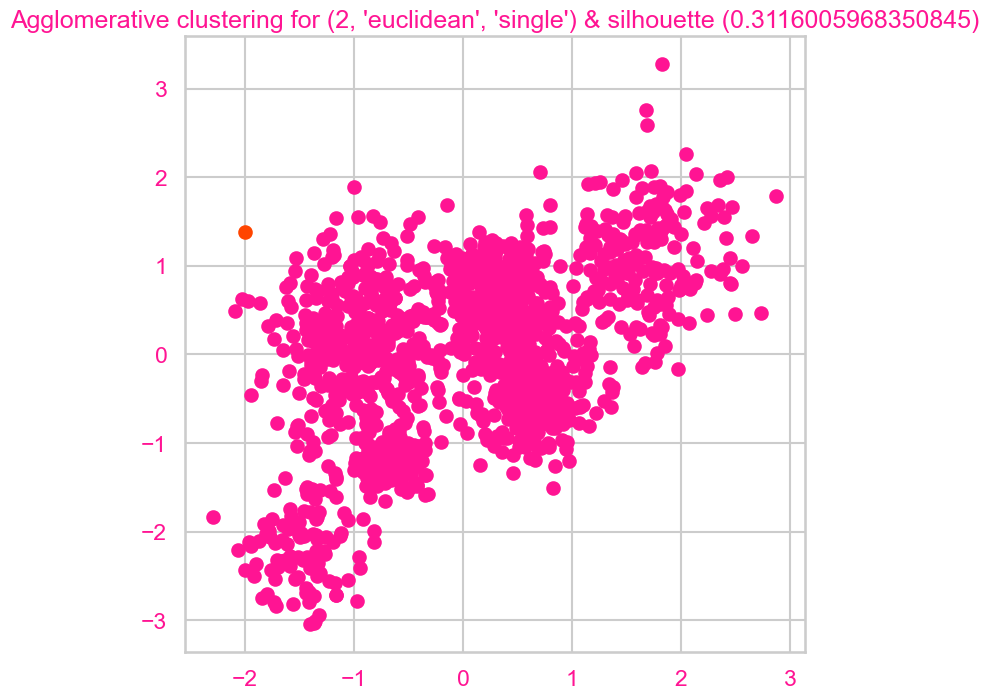

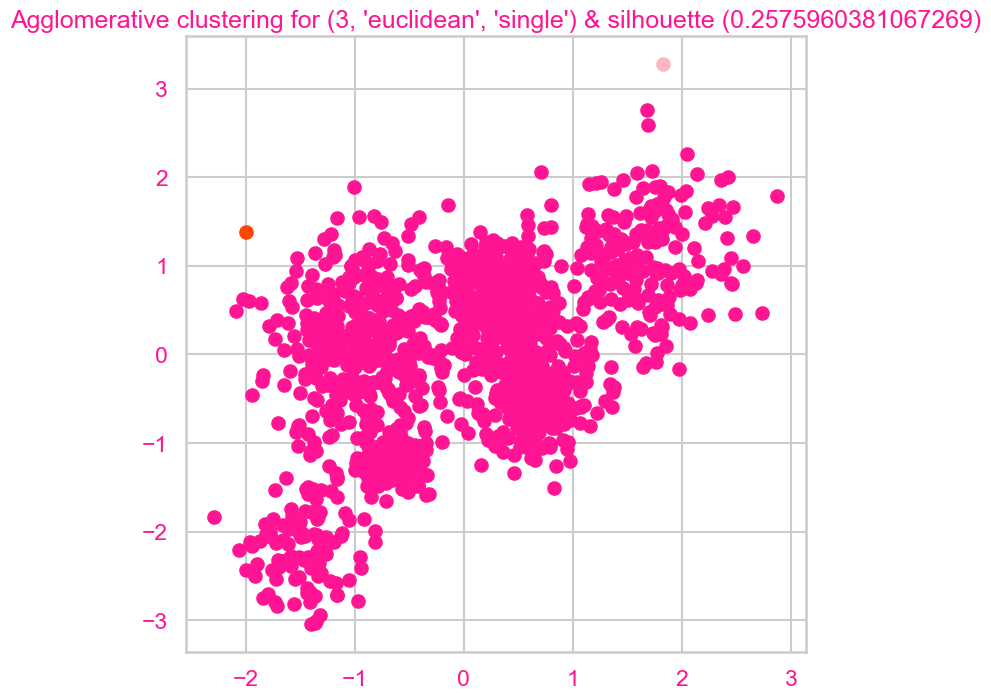

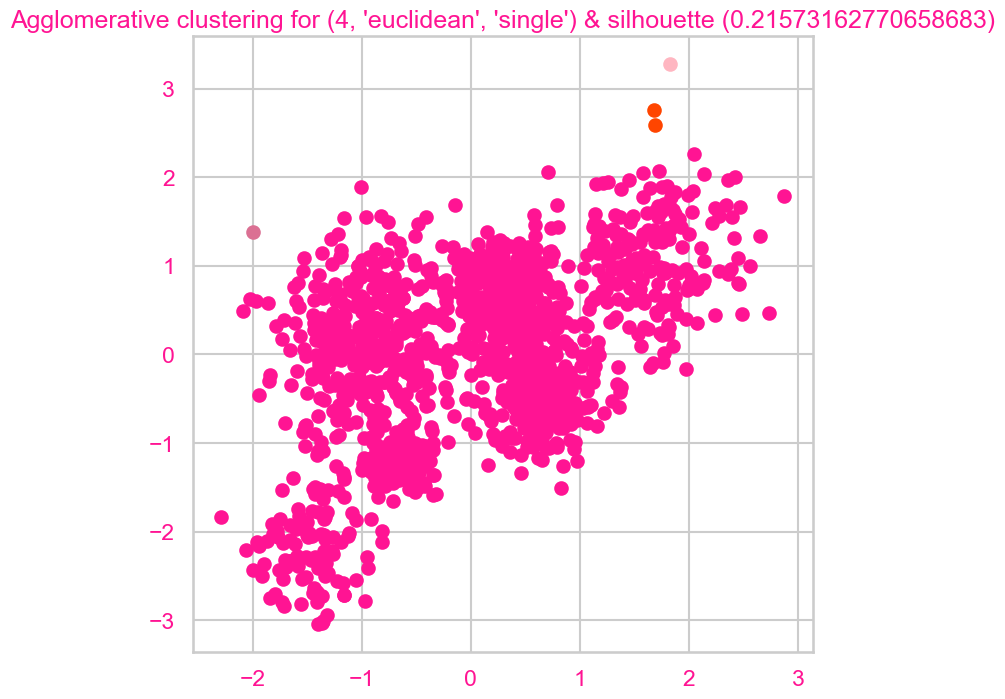

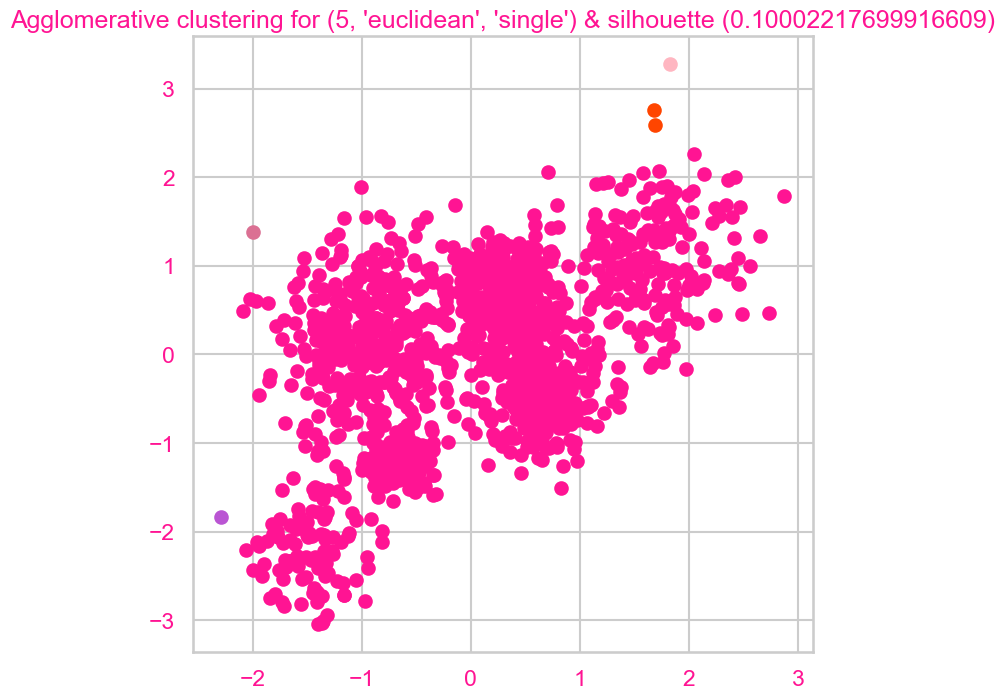

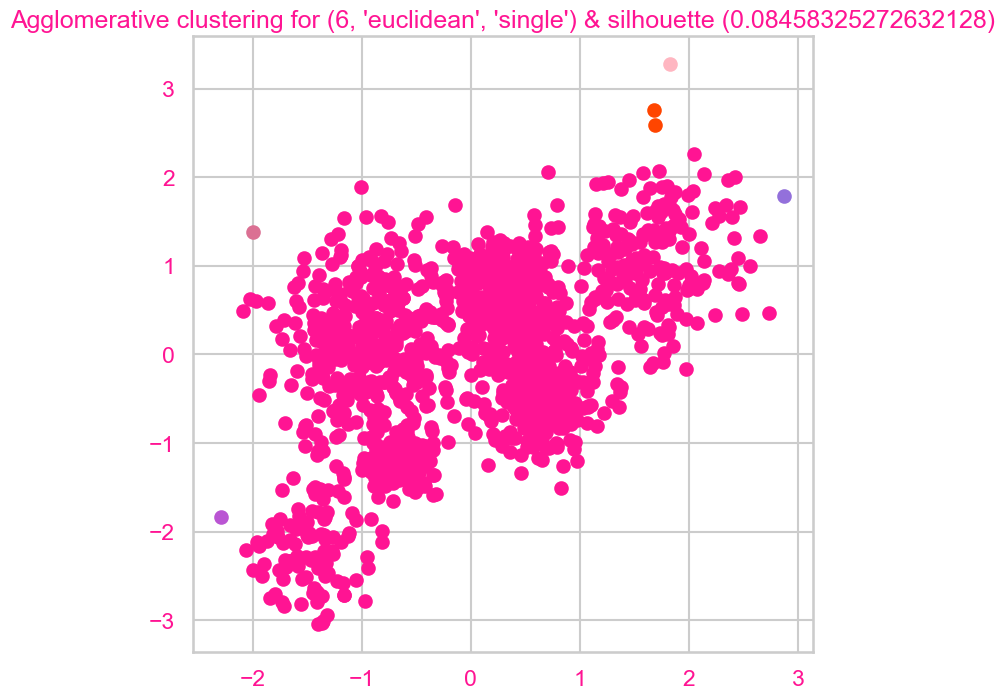

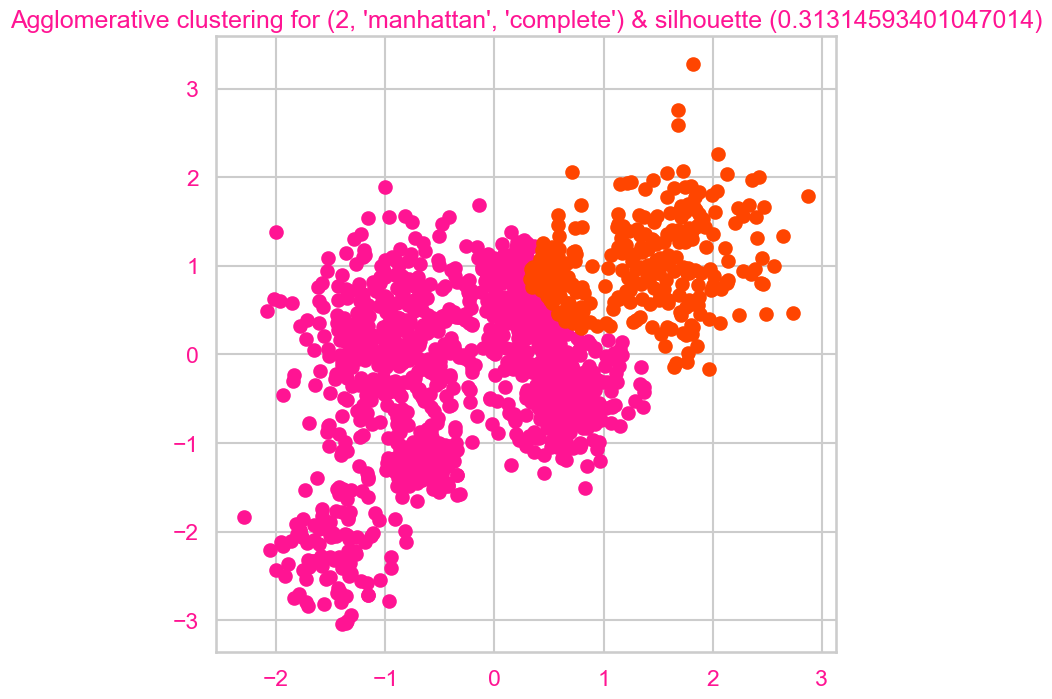

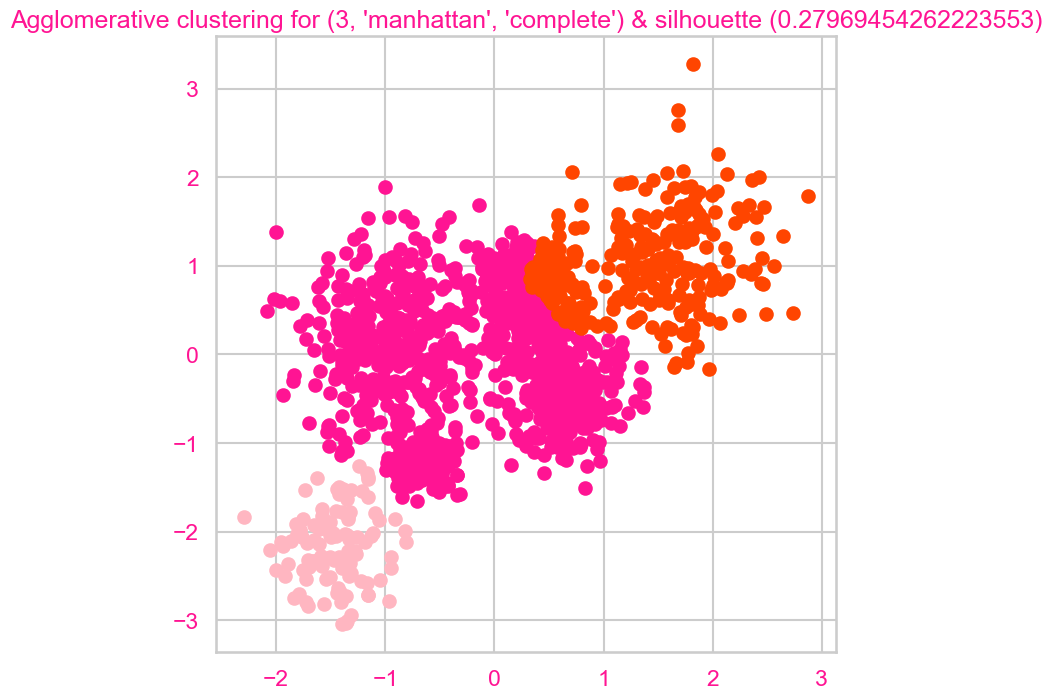

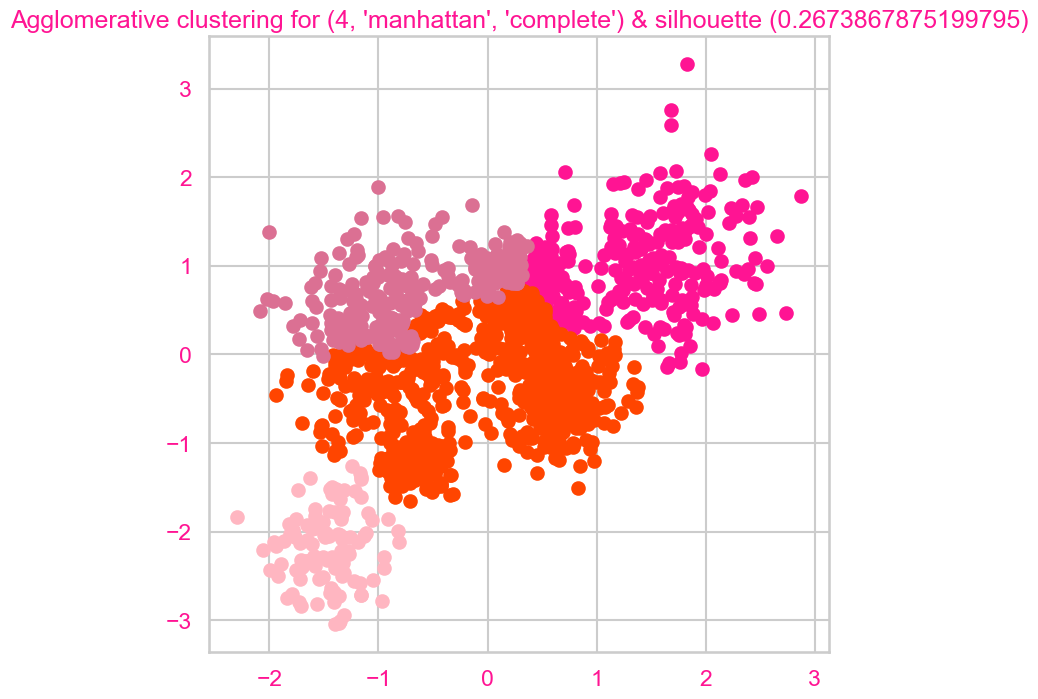

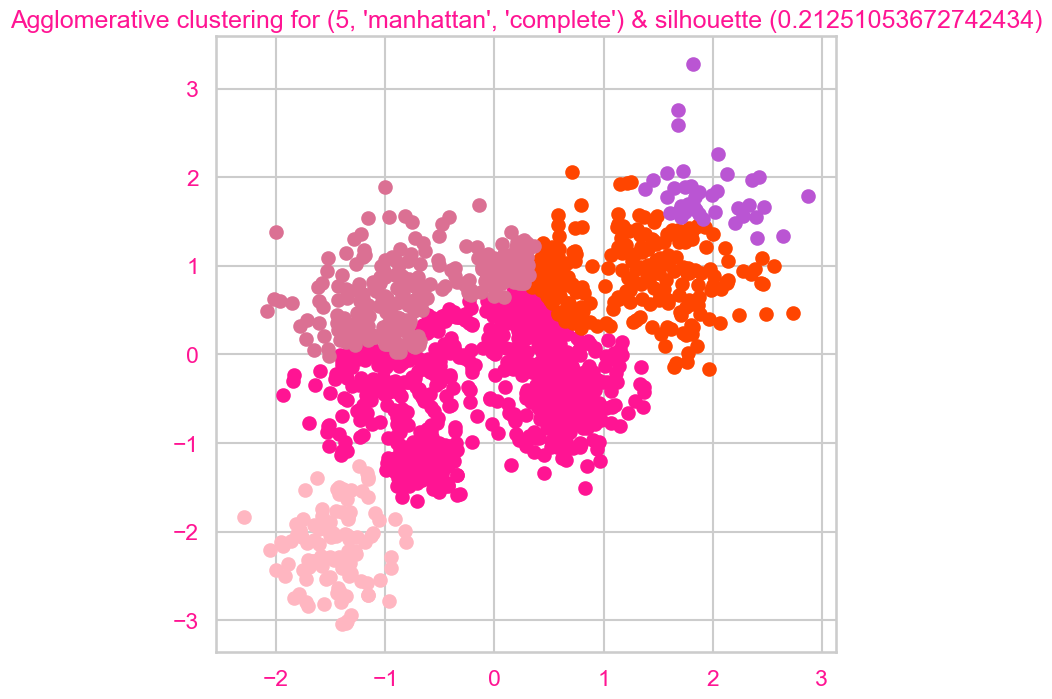

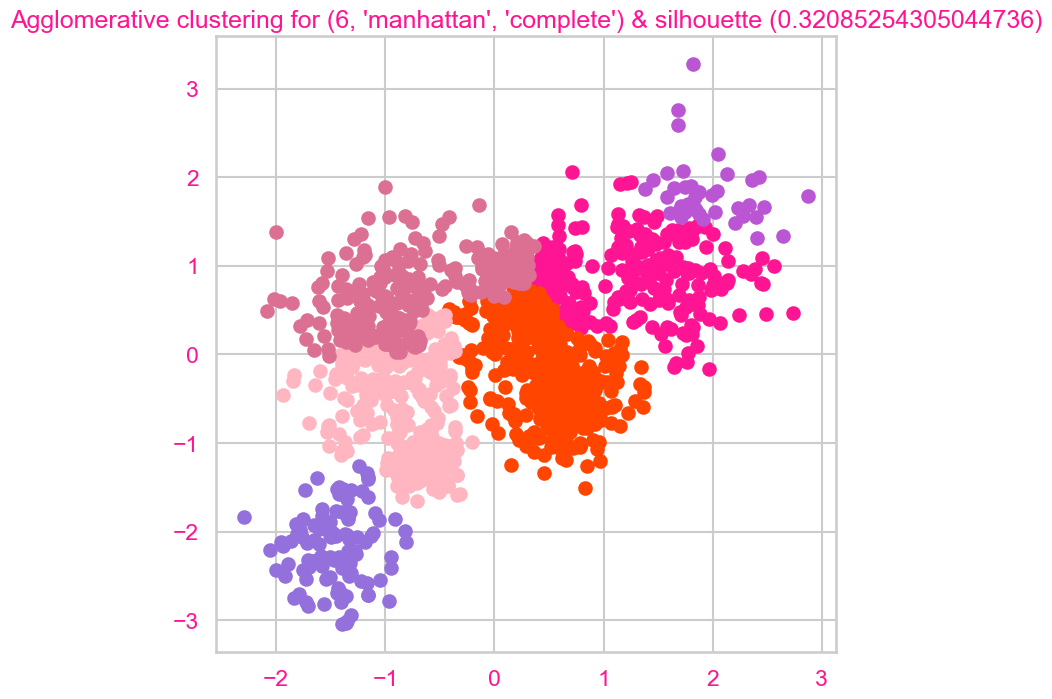

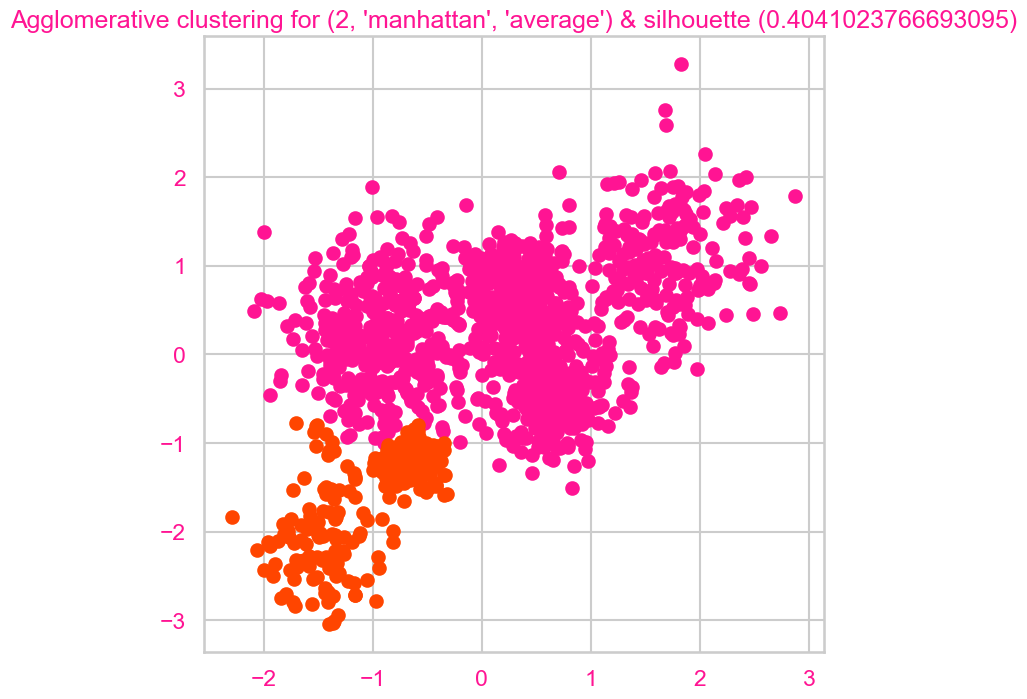

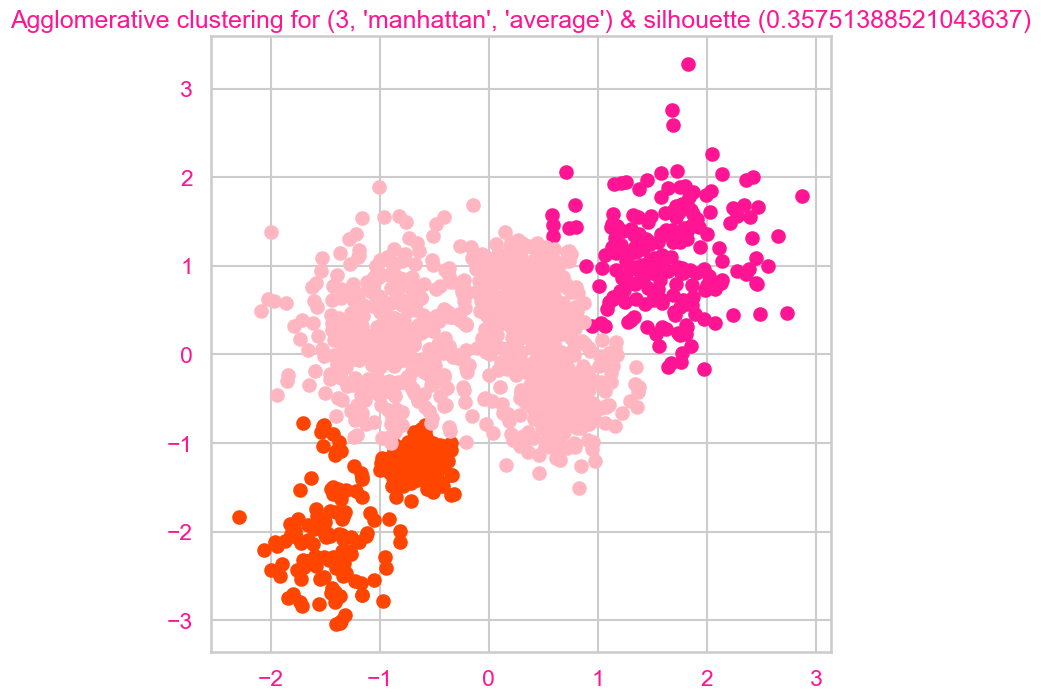

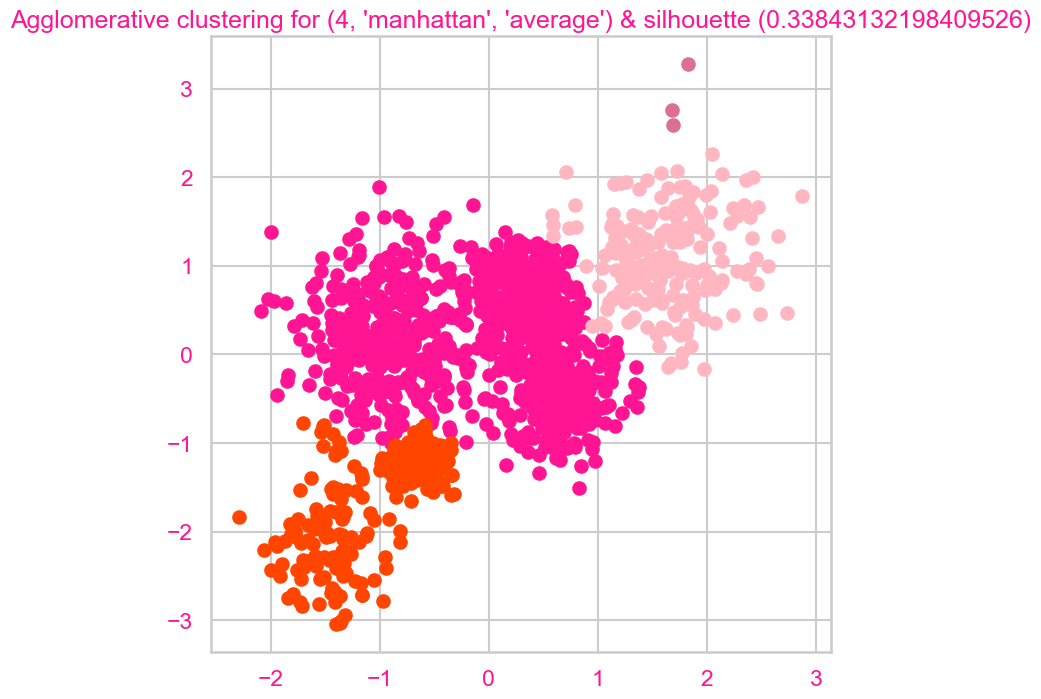

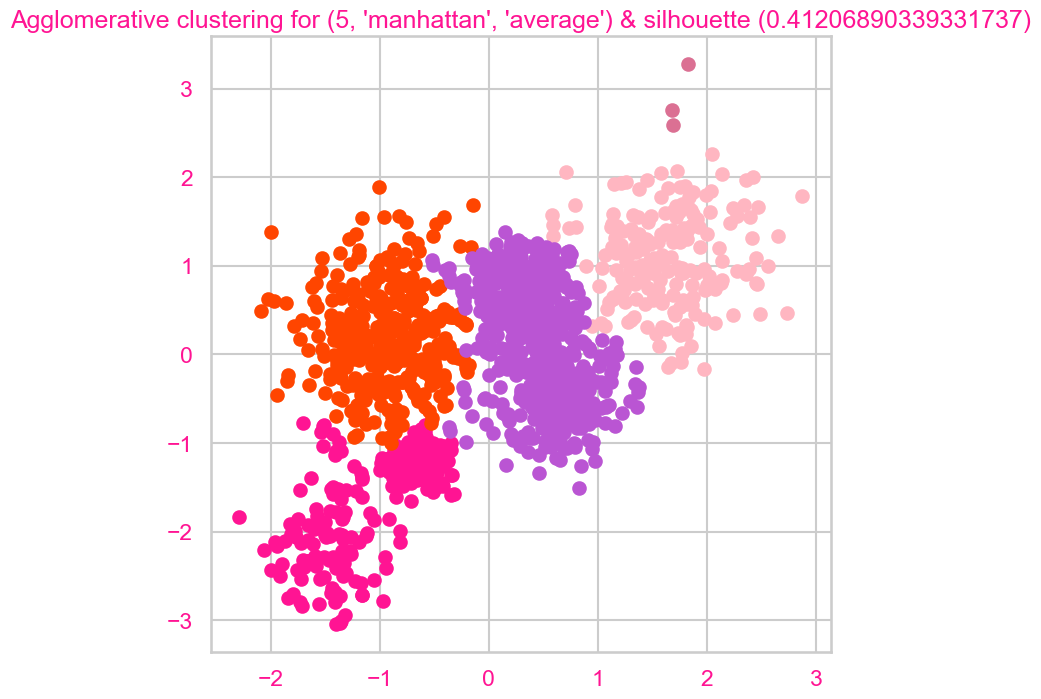

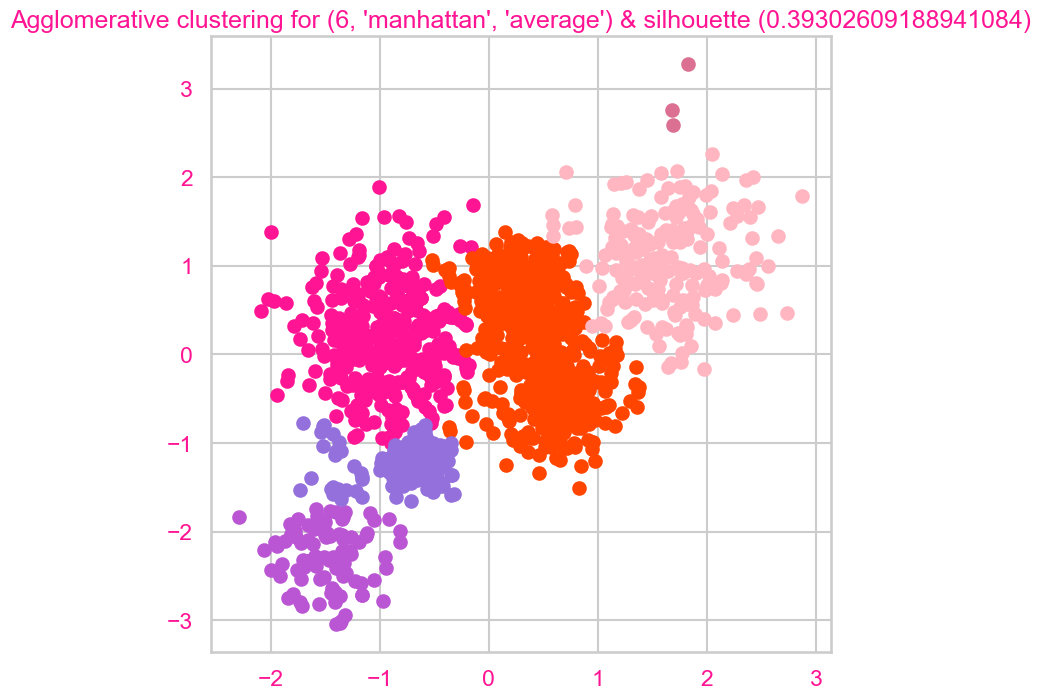

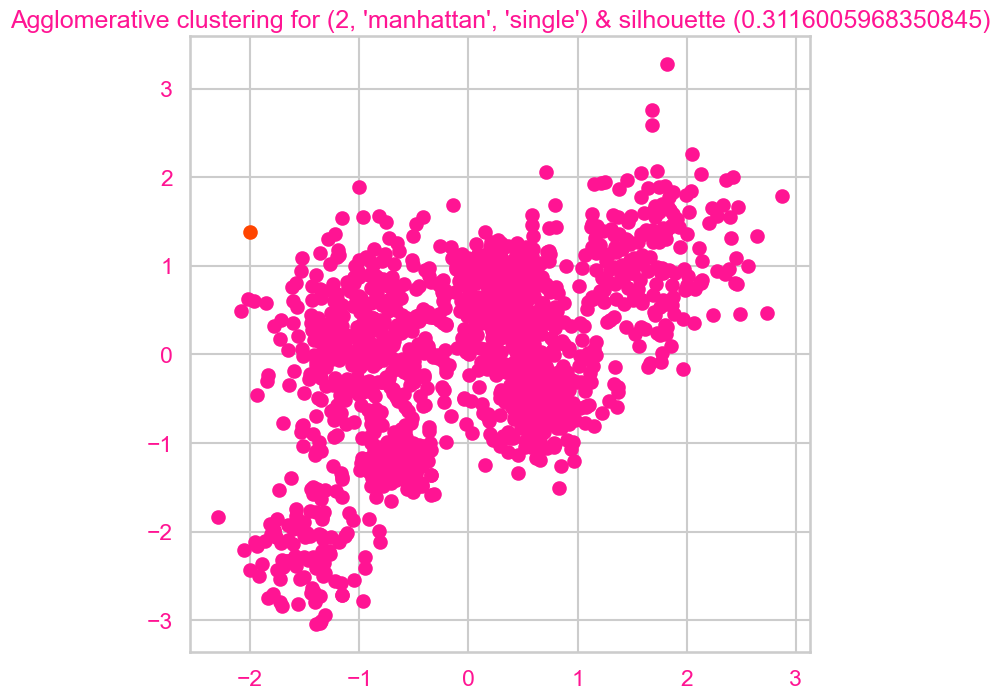

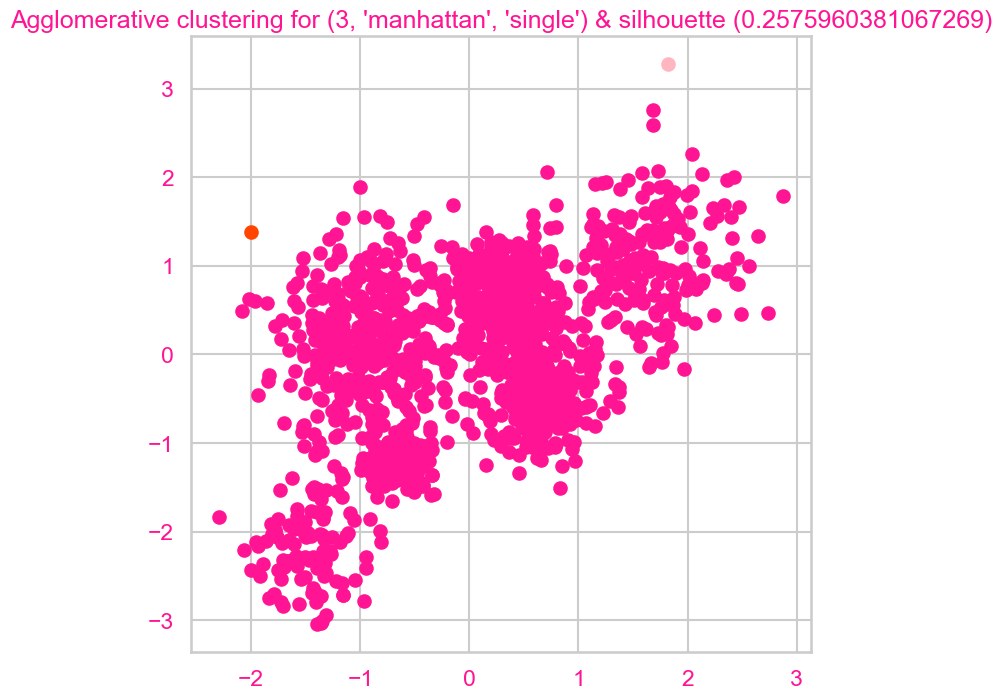

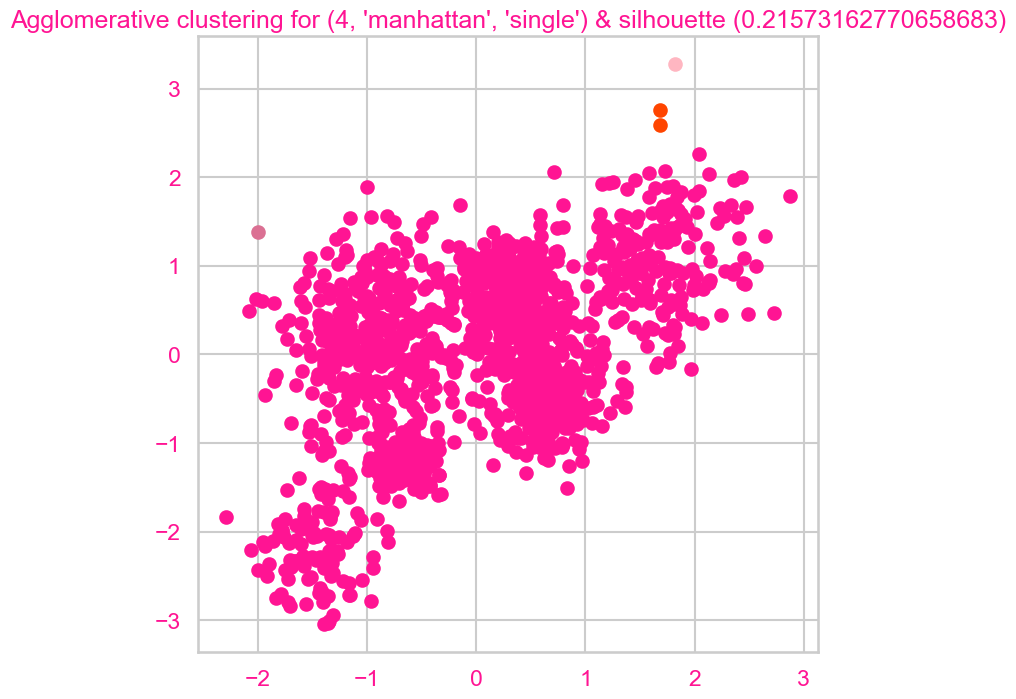

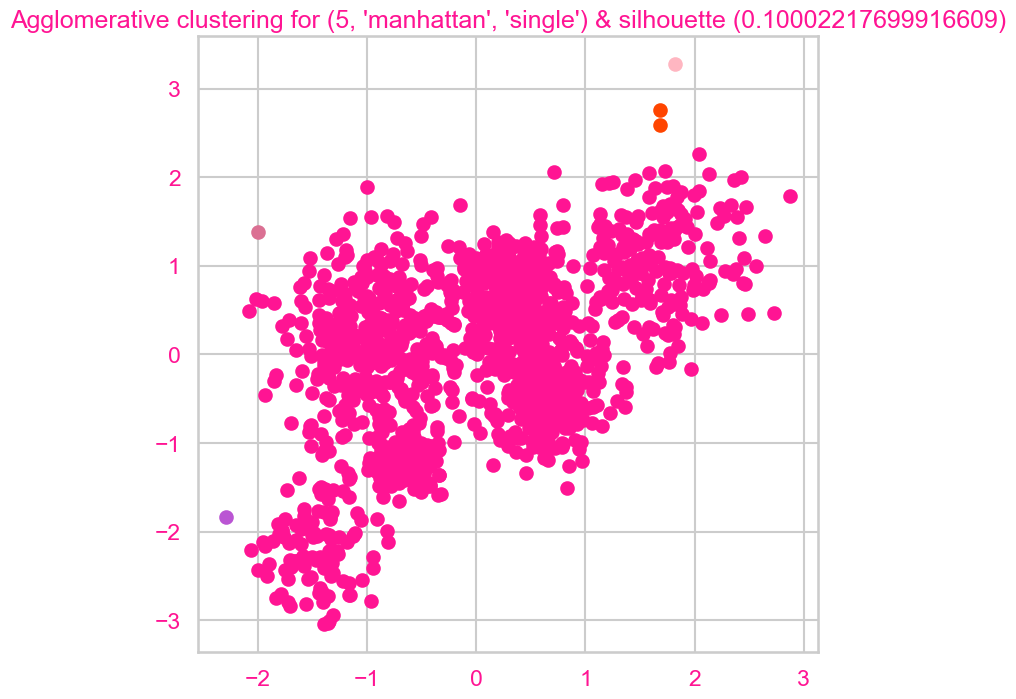

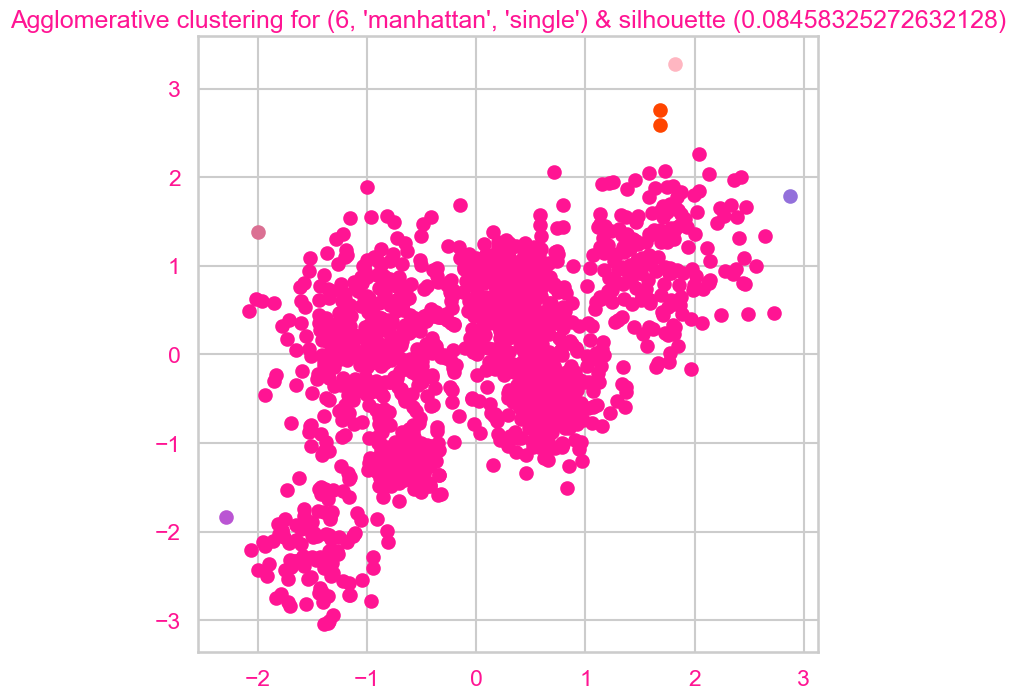

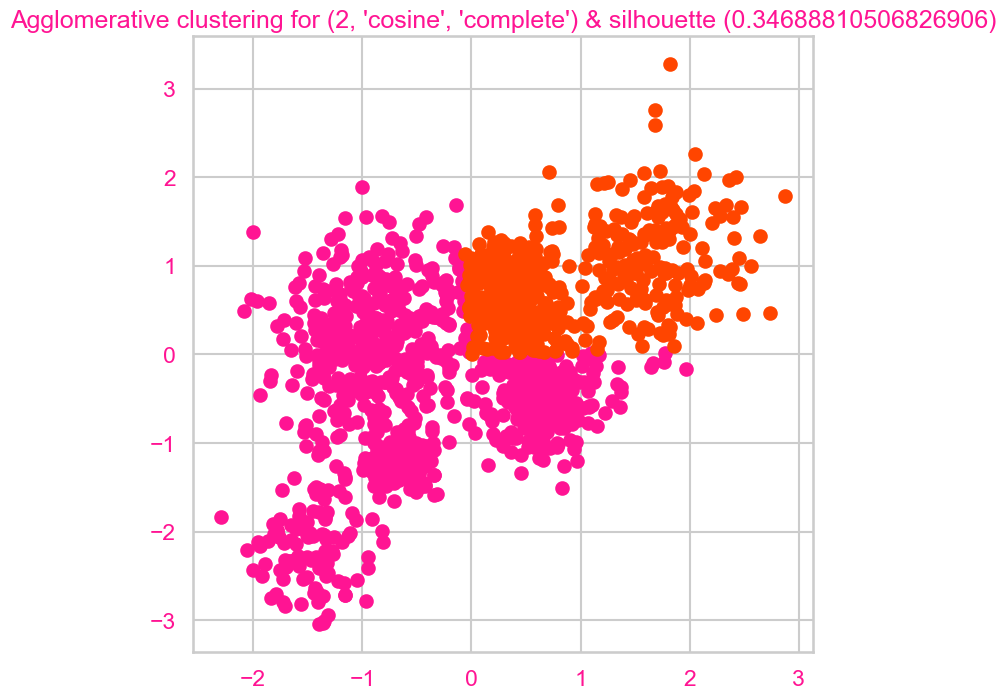

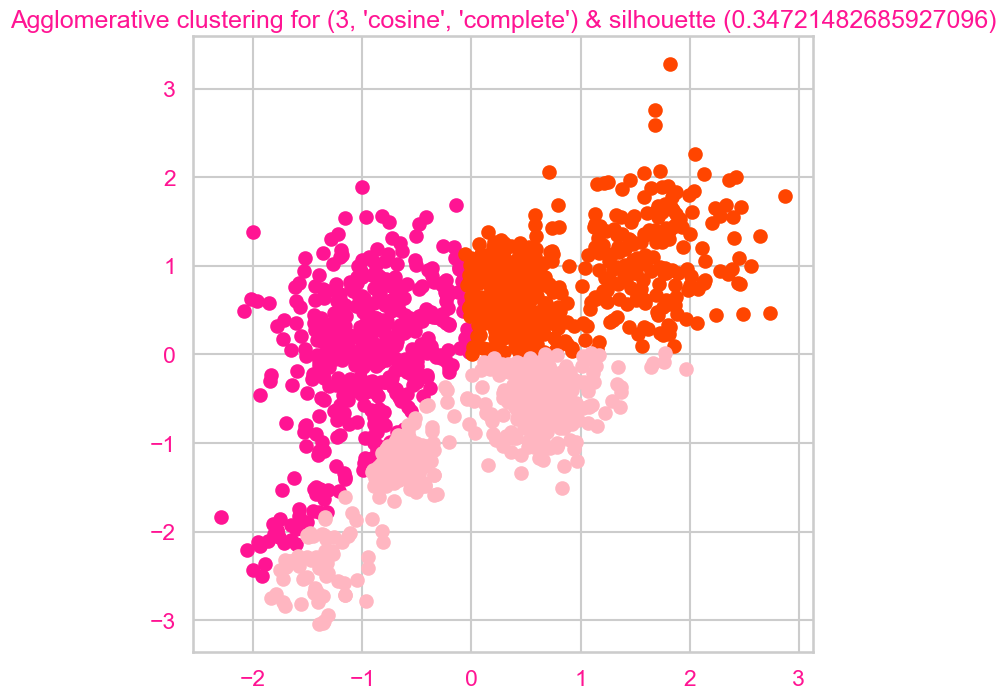

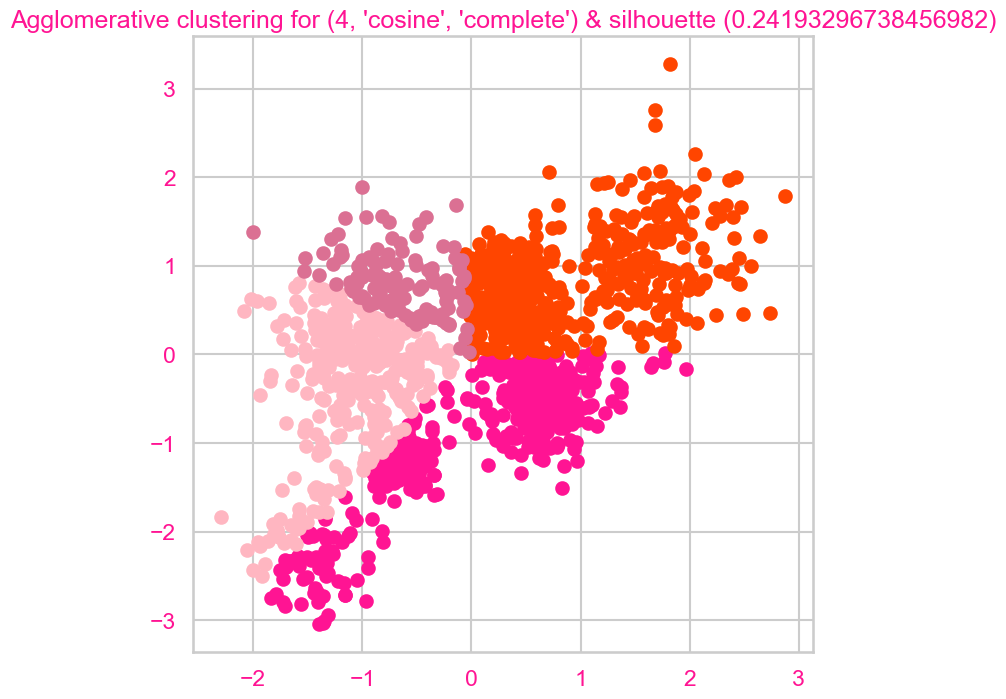

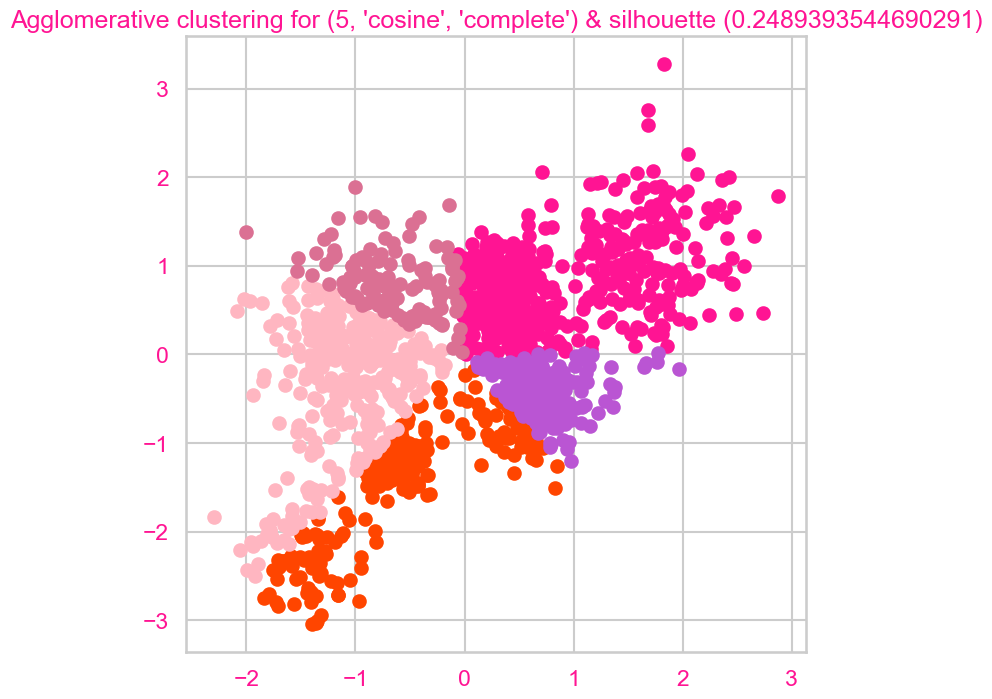

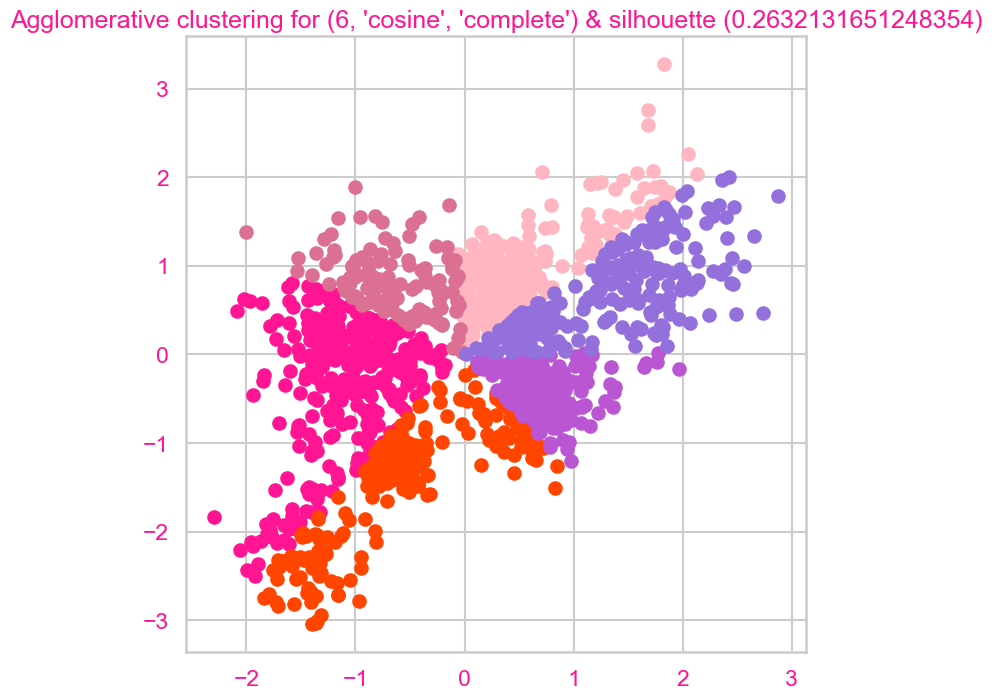

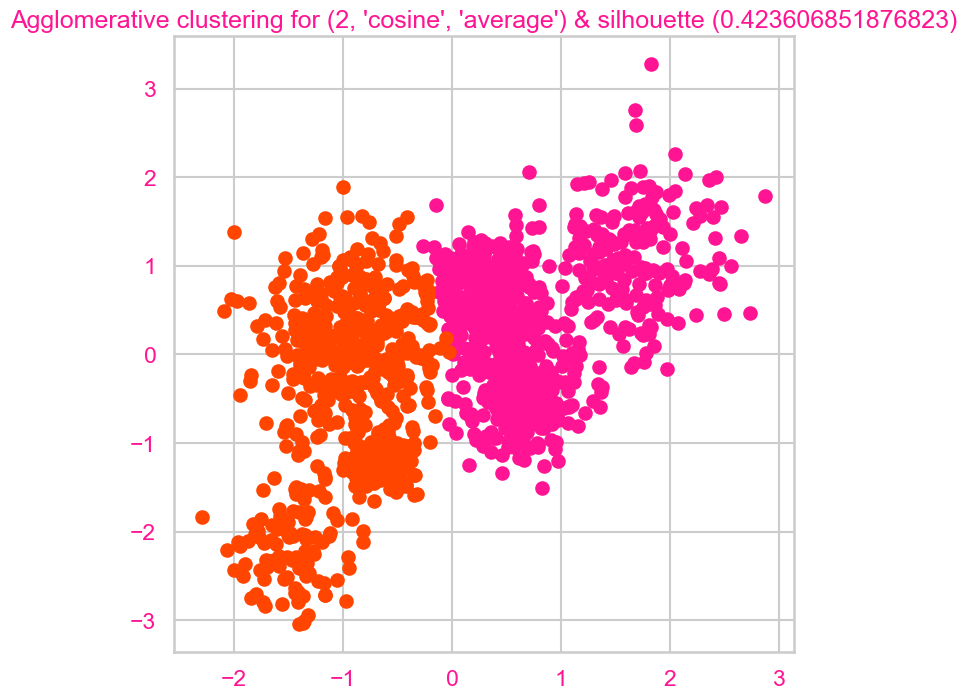

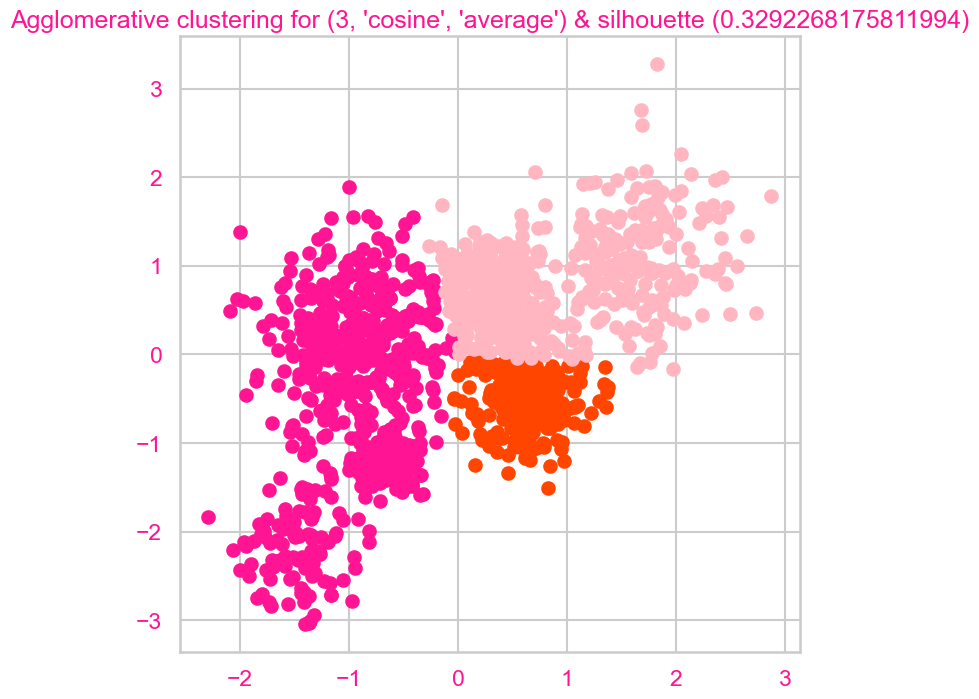

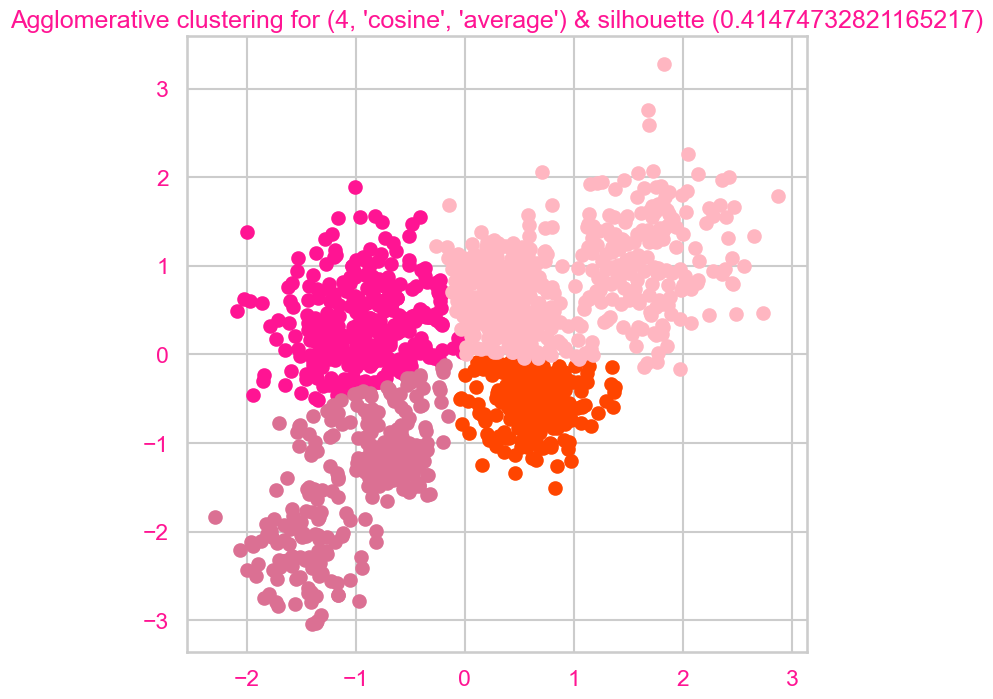

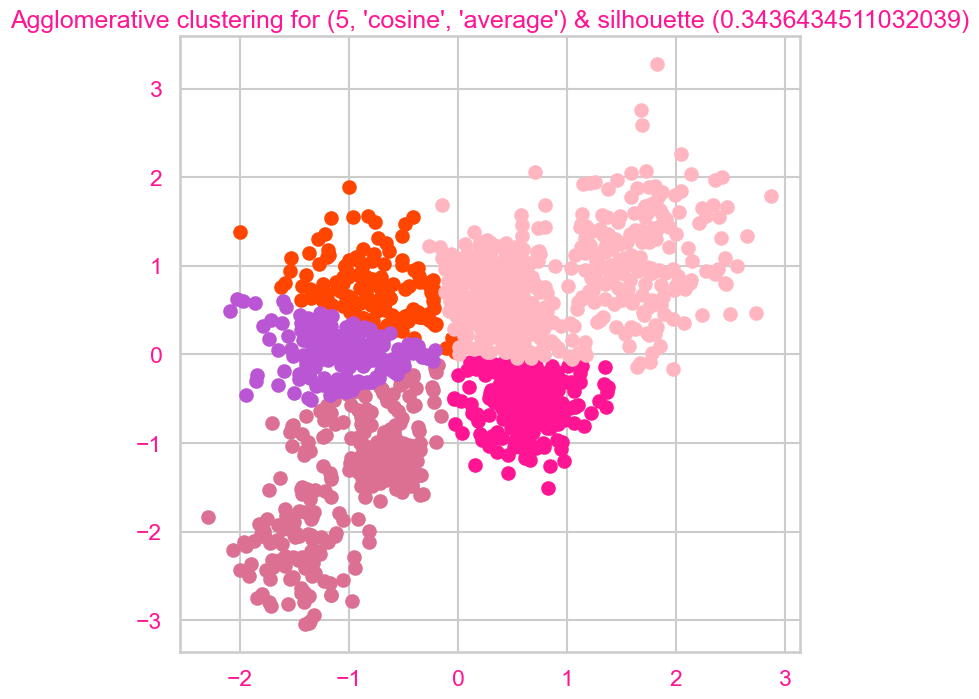

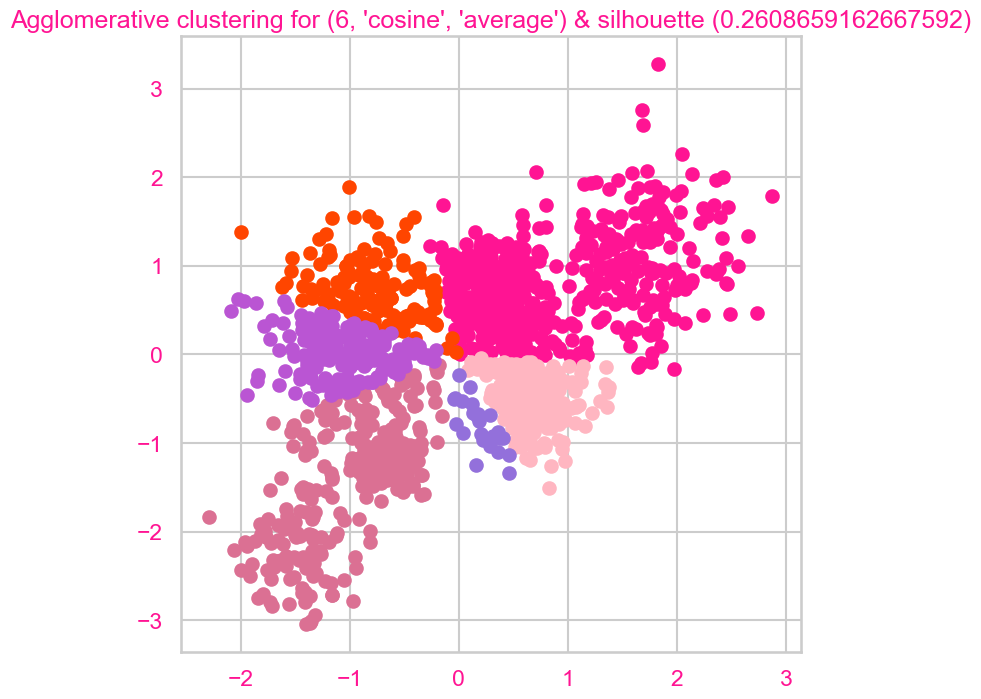

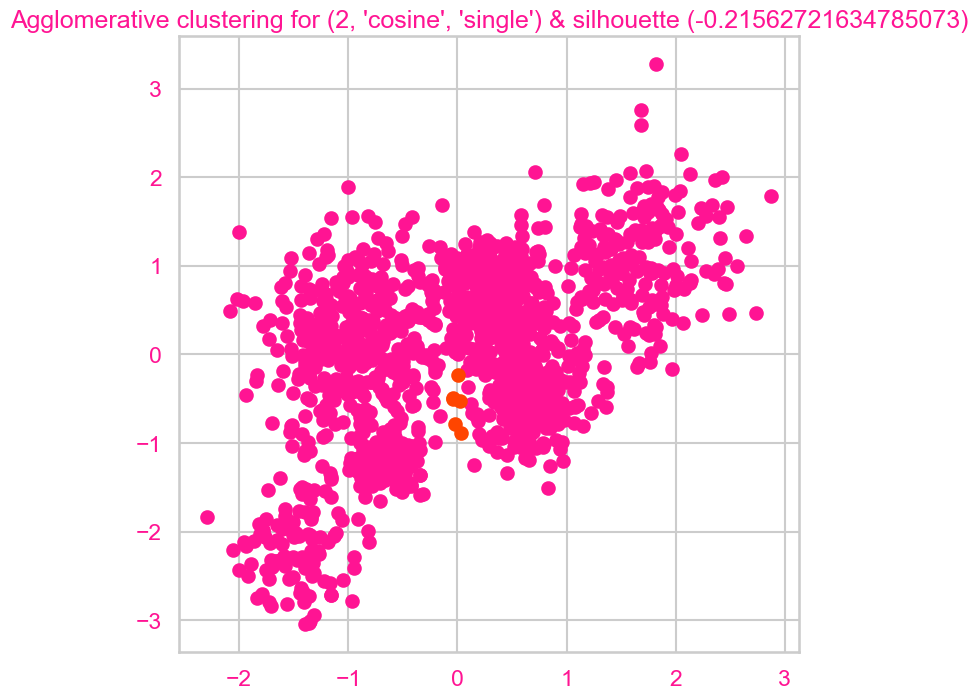

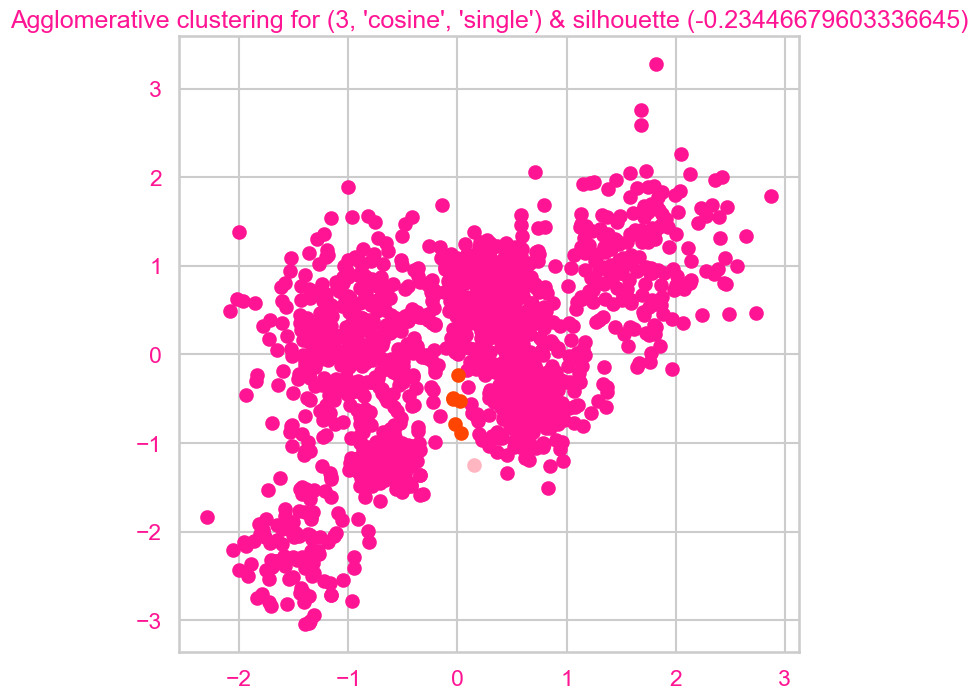

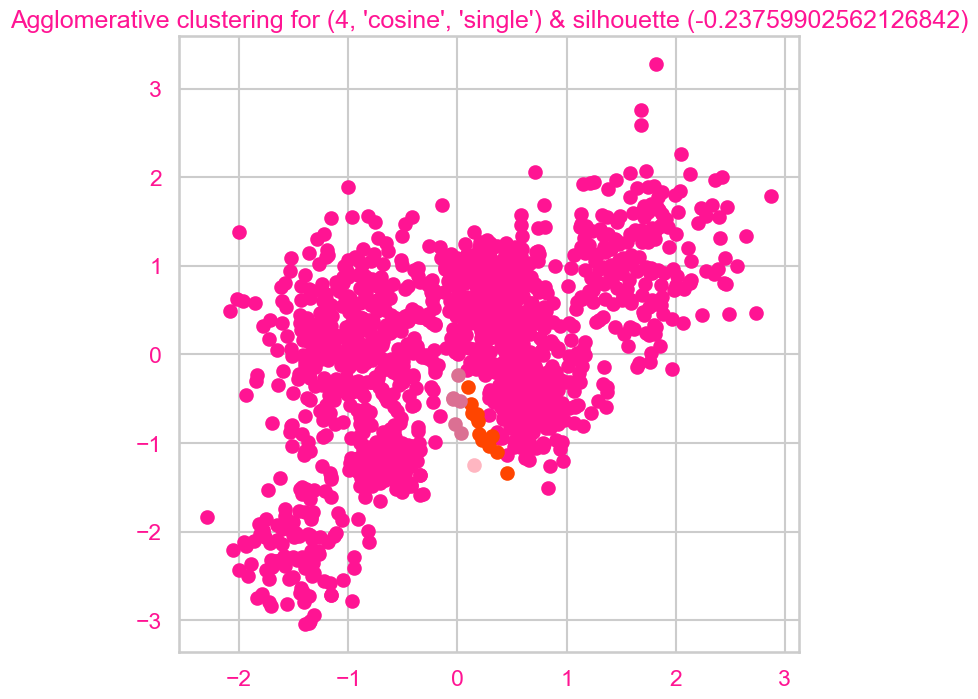

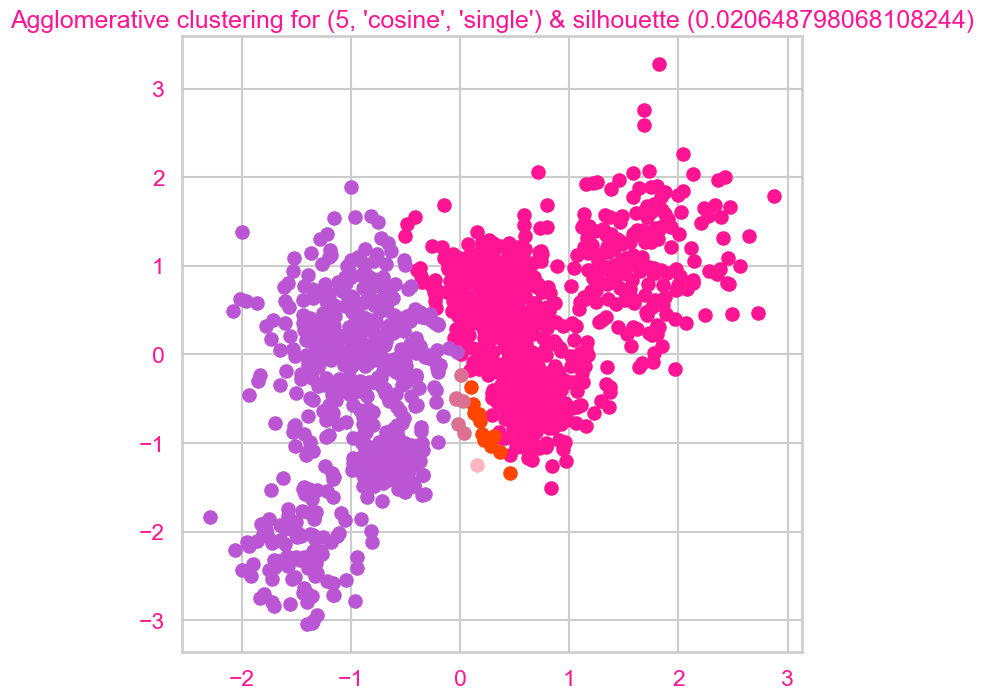

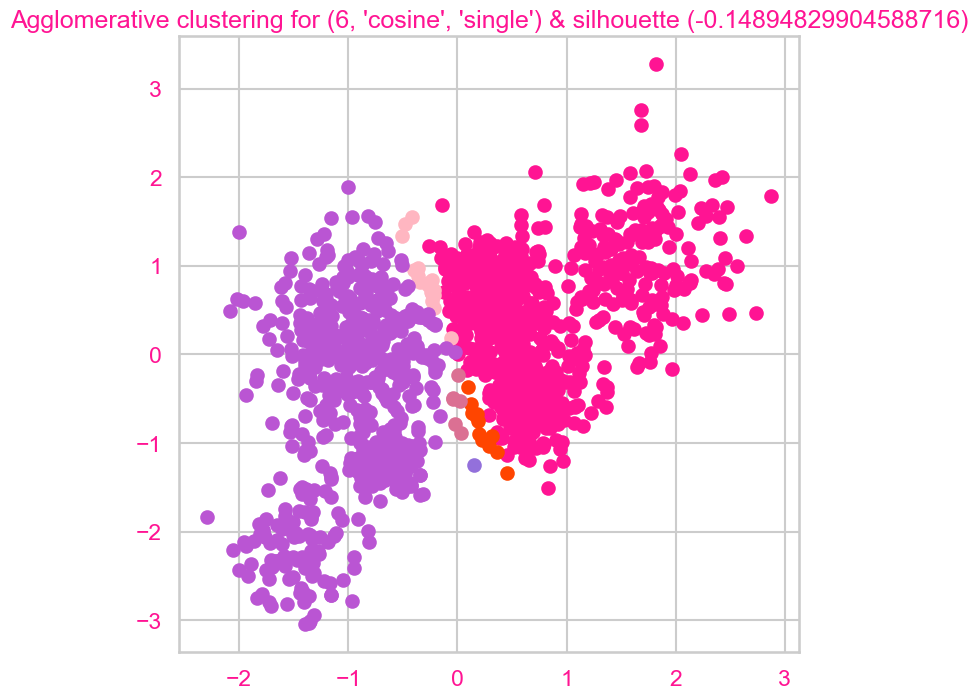

In [104]:
i=0
for key, model in models.items(): #change between models and models_d
    silhouette = silhouette_scores[i]
    display_cluster_dbscan(Multi_blob_Data, km=model, title=f"Agglomerative clustering for {key} & silhouette ({silhouette})")
    i+=1

## Iris Dataset 
The iris data set is a test data set that is part of the Sklearn module 
which contains 150 records, each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 
['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

In [107]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
list(iris_data.target_names)

['setosa', 'versicolor', 'virginica']

In [108]:
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df['species'] = iris_data.target
iris_df['species_name'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa

### K means for Iris dataset

In [113]:
k_range_iris = np.arange(2,10)

In [115]:
ssd_iris, silhouette_scores_iris, km_models_iris = k_means(iris_data.data, k_range_iris)

In [117]:
kmean_silhouette_iris = np.argmax(silhouette_scores_iris)
best_k_iris = k_range_iris[kmean_silhouette_iris]
best_silhouette_iris = silhouette_scores_iris[kmean_silhouette_iris]
print(f"The best sillouette is for {best_k_iris} clusters is: {best_silhouette_iris}")

The best sillouette is for 2 clusters is: 0.6810461692117462


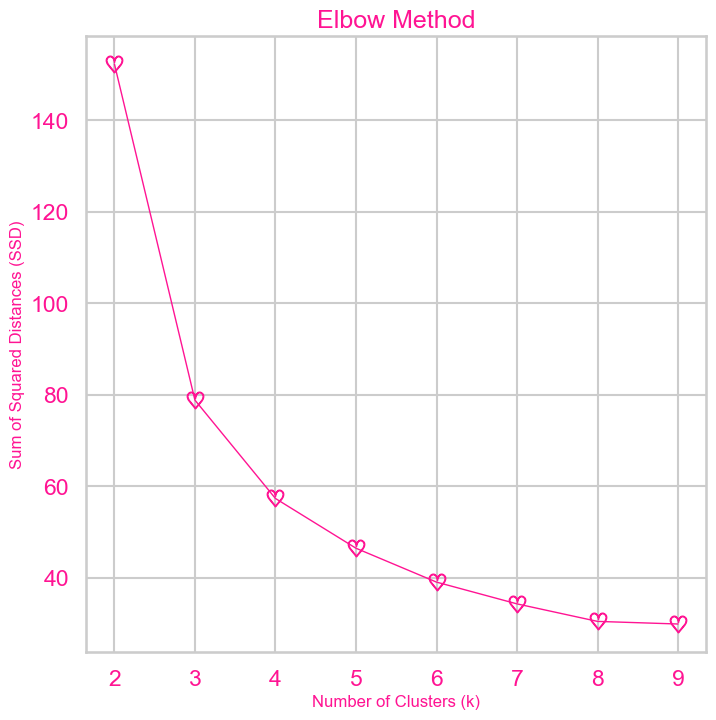

In [119]:
plot_ssd(k_range_iris,ssd_iris)

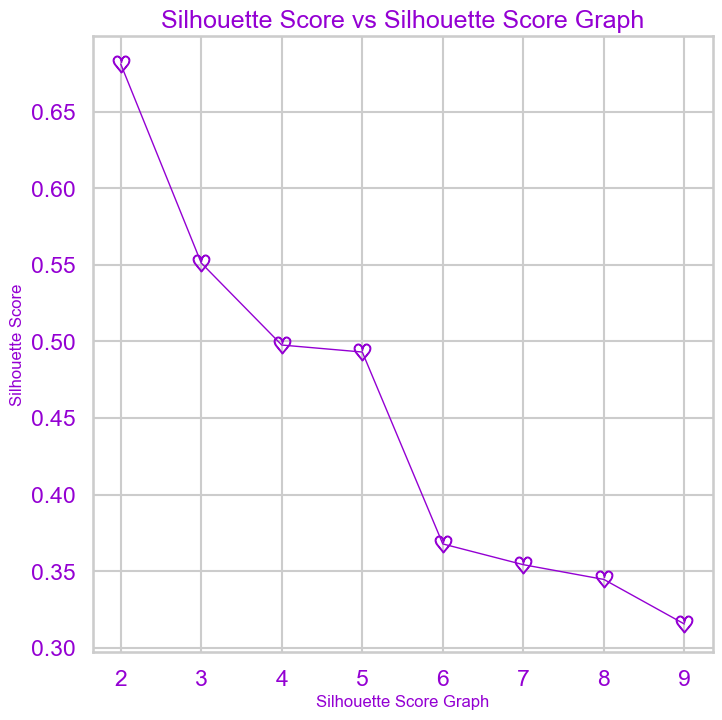

In [121]:
plot_silhouette(k_range_iris,silhouette_scores_iris)

#### Scaled Iris Dataset

In [124]:
iris_data_scaled = StandardScaler().fit_transform(iris_data.data)

In [126]:
ssd_iris_scaled, silhouette_scores_iris_scaled, km_models_iris_scaled = k_means(iris_data_scaled, k_range_iris)

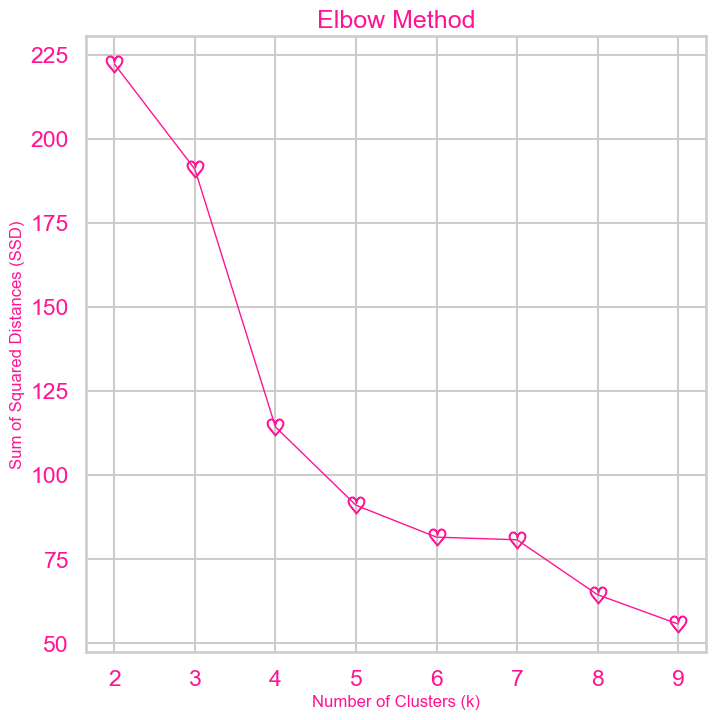

In [127]:
plot_ssd(k_range_iris,ssd_iris_scaled)

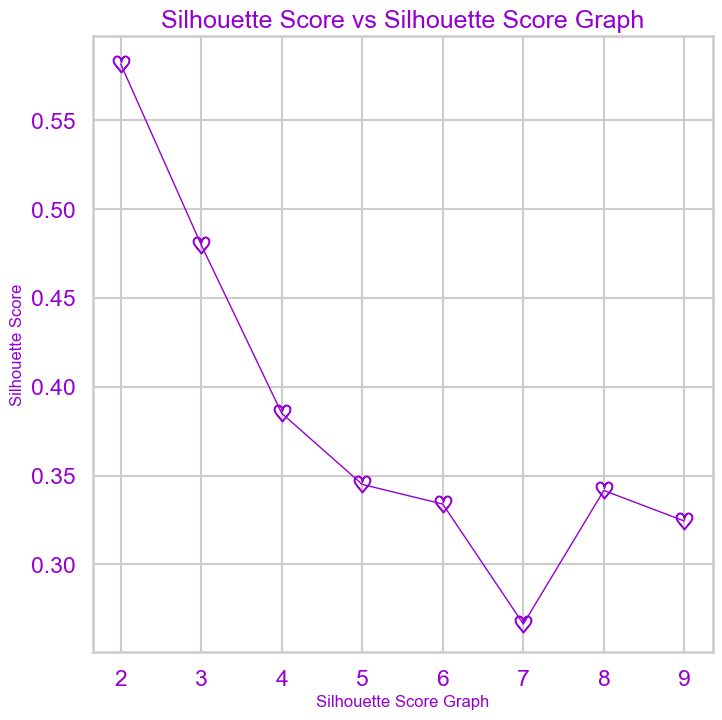

In [128]:
plot_silhouette(k_range_iris,silhouette_scores_iris_scaled)

#### Clustering checks

In [133]:
from sklearn.metrics import adjusted_rand_score
ari_scores = []
for k in k_range_iris:
    model = km_models_iris[k]
    y_pred = model.predict(iris_data.data)
    ari_score = adjusted_rand_score(iris_data.target, y_pred)
    ari_scores.append(ari_score)
print(ari_scores)
# A function that checks if the clustering result of a given model matches the true target labels. 
# ARI accounts for the fact that cluster labels may be permuted (e.g., Cluster 1 and 2 may be swapped)

[0.5399218294207123, 0.7163421126838476, 0.5983278434991391, 0.6154838709677419, 0.45507224888954784, 0.4805528447544014, 0.4379276826120263, 0.4382135839838564]


### DBSCAN for Iris dataset

In [135]:
eps_values = np.linspace(0.1, 3, 50)
min_samples_values = np.arange(5,25)
models, best_eps, best_min_samples = dbscan(iris_data_scaled,eps_values,min_samples_values) #This function loops over eps and min_samples creating a series of models

In [137]:
print(f"The best epsilon is {best_eps} and best minimum samples is {best_min_samples} according to silhouette score")

The best epsilon is 1.4020408163265305 and best minimum samples is 5 according to silhouette score


In [141]:
min_sample = 5
models_eps, silhouette_eps = dbscan_eps(iris_data_scaled, eps_values, min_sample) #This function loops over only eps 

In [143]:
eps_value = 1.402
models_min_sample, silhouette_min_sample = dbscan_min_samples(iris_data_scaled, min_samples_values, eps_value) #This function loops over only minimum samples 

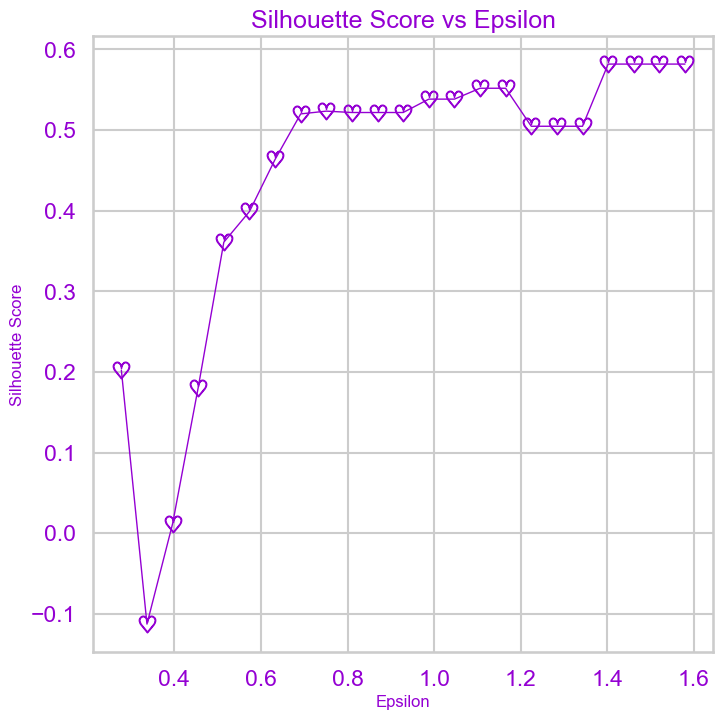

In [145]:
plot_silhouette(eps_values,silhouette_eps, "Epsilon")

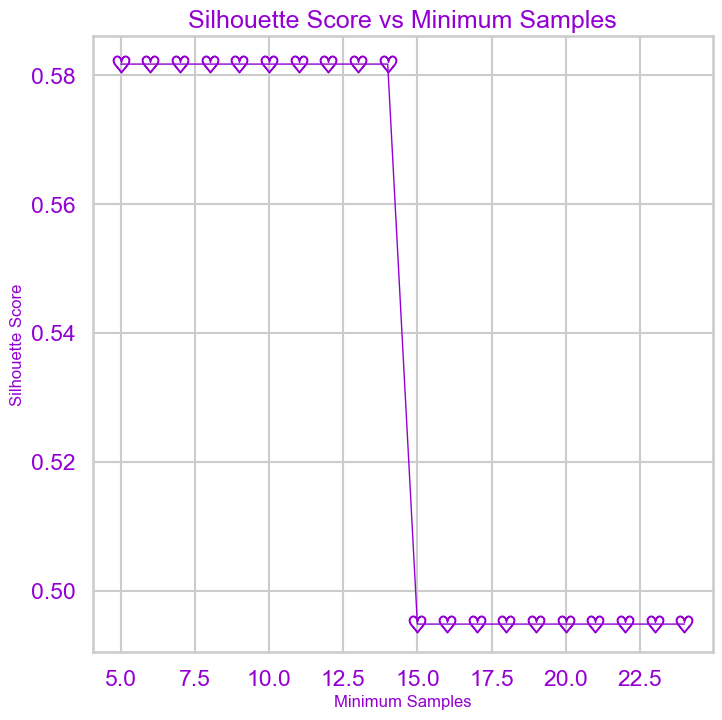

In [147]:
plot_silhouette(min_samples_values,silhouette_min_sample, "Minimum Samples")

In [149]:
test_eps = min(eps_values, key=lambda x: abs(x - eps_value)) #Avoid errors if exact value is not in the models matrix
test_model = models.get((test_eps, min_sample))

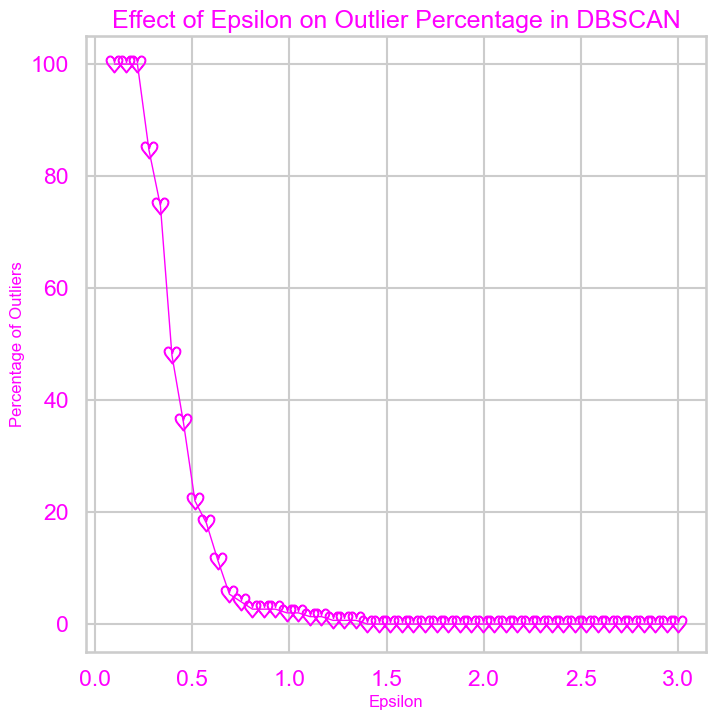

In [151]:
metricVSoutliers (iris_data_scaled, eps_values, models_eps, xtitle="Epsilon")

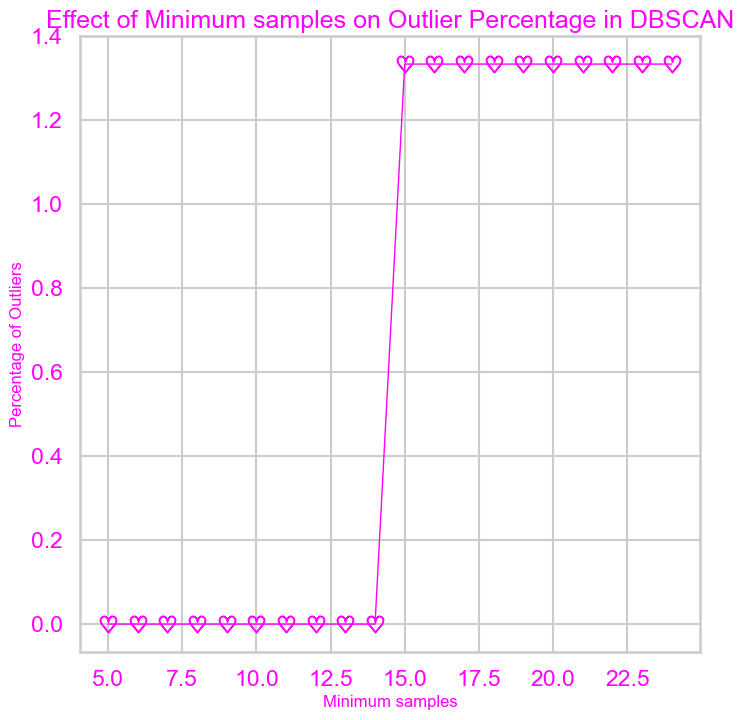

In [153]:
metricVSoutliers (iris_data_scaled, min_samples_values, models_min_sample, xtitle="Minimum samples")

#### Clustering checks

In [156]:
labels = test_model.labels_  
ari_score = adjusted_rand_score(iris_data.target, labels)
print(ari_score)

0.5681159420289855


In [158]:
ari_scores = []

for (eps, min_samples), model in models.items():
    labels = model.labels_  
    if len(set(labels)) > 1:  
        ari_score = adjusted_rand_score(iris_data.target, labels)
        ari_scores.append(((eps, min_samples), ari_score))
    else:
        ari_scores.append(((eps, min_samples), None))  

best_params, best_ari = max(ari_scores, key=lambda x: x[1] if x[1] is not None else -1) # to neglect the NONE when two clusters or less
best_eps, best_min_samples = best_params

print(f"The best ARI calculated is {best_ari} corresponding to epsilon and minimum sample values: {best_eps} & {best_min_samples}")

The best ARI calculated is 0.5681159420289855 corresponding to epsilon and minimum sample values: 1.4020408163265305 & 5


### Hierarchial Clustering for Iris dataset

In [161]:
affinities = ["euclidean", "manhattan", "cosine"]
linkages = ["complete", "average", "single"]
n_clusters = np.arange(2,7)

best_n, best_affinity, best_linkage, best_silhouette, silhouette_scores, models = hierarchical_clustering_n(iris_data_scaled, affinities, linkages, n_clusters)

In [163]:
print(f"Best agglomerative clustering model for this data where number of clusters is {best_n} with linkage of {best_linkage} and affinity of {best_affinity}. "
      f"Silhouette Score is {best_silhouette}.")

Best agglomerative clustering model for this data where number of clusters is 2 with linkage of single and affinity of manhattan. Silhouette Score is 0.5817500491982808.


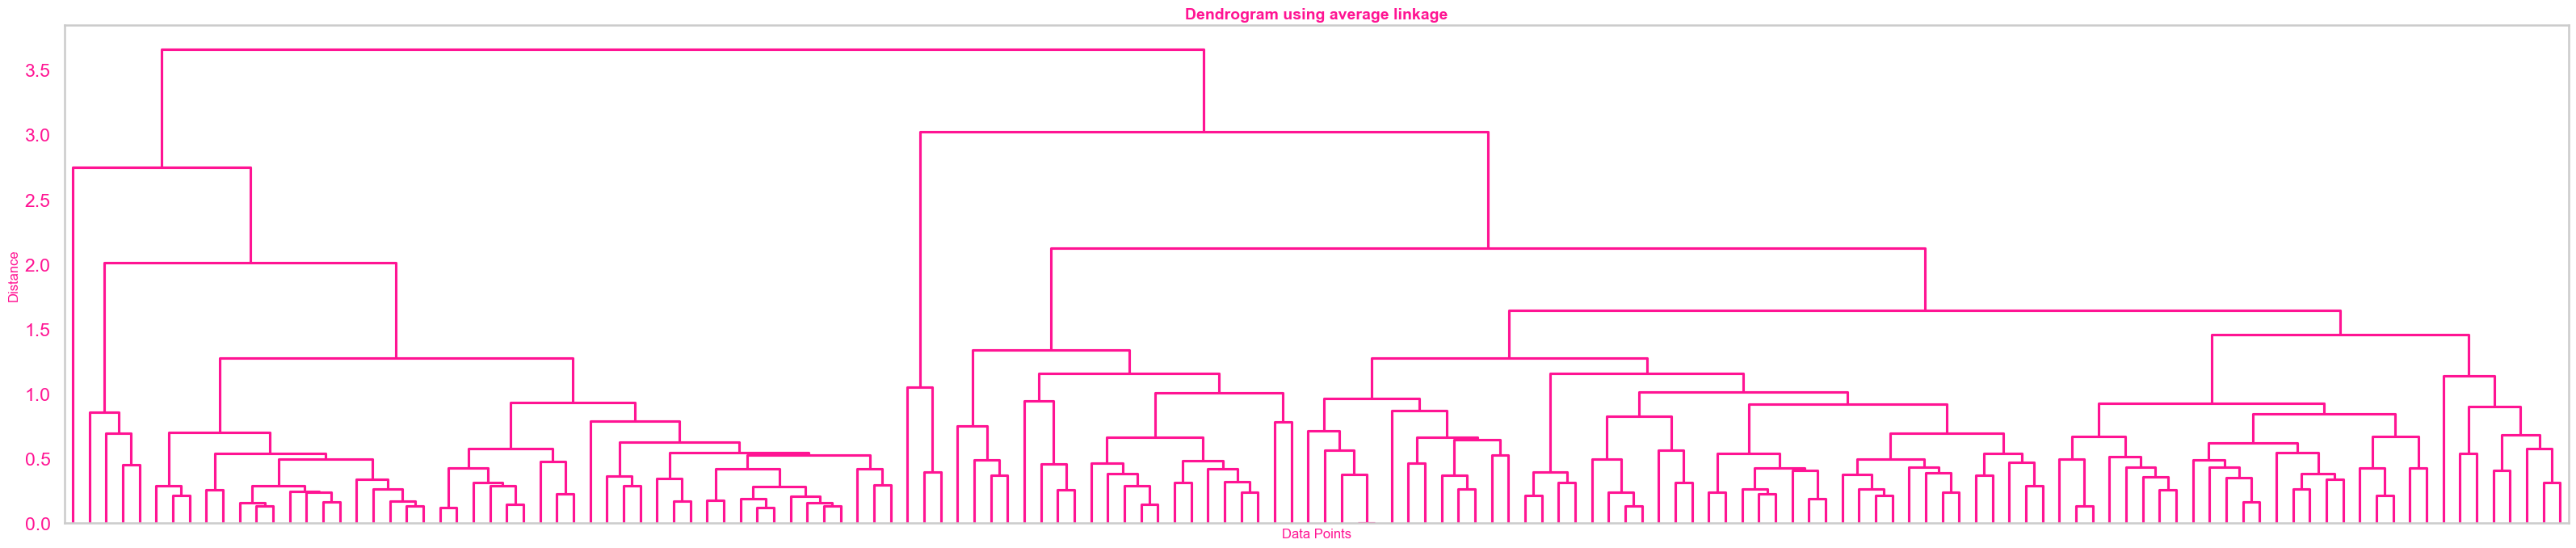

In [165]:
plot_dendrogram(iris_data_scaled, "average")

#### Clustering checks

In [168]:
best_model = models.get((best_n, best_affinity, best_linkage))
labels = best_model.labels_  
ari_score = adjusted_rand_score(iris_data.target, labels)
print(ari_score)

0.5681159420289855


In [170]:
ari_scores = []

for (best_n, best_affinity, best_linkage), model in models.items():
    labels = model.labels_  
    if len(set(labels)) > 1:  
        ari_score = adjusted_rand_score(iris_data.target, labels)
        ari_scores.append(((eps, min_samples), ari_score))
    else:
        ari_scores.append(((eps, min_samples), None))  

best_params, best_ari = max(ari_scores, key=lambda x: x[1] if x[1] is not None else -1) # to neglect the NONE when two clusters or less
best_eps, best_min_samples = best_params

print(f"The best ARI calculated is {best_ari} corresponding to epsilon and minimum sample values: {best_n} & {best_affinity} & {best_linkage}")

The best ARI calculated is 0.7183576141196959 corresponding to epsilon and minimum sample values: 6 & cosine & single


## Customer dataset
Repeat all the above on the customer data set 

First, this dataset needs some data engineering :) 

In [178]:
Customer_data = pd.read_csv('Customer data.csv')
Customer_data.set_index("ID", inplace=True)

In [180]:
def handle_outliers(df, columns, factor=1.5):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        # Cap the outliers
        df_clean[col] = np.where(df_clean[col] < lower_bound, lower_bound, df_clean[col])
        df_clean[col] = np.where(df_clean[col] > upper_bound, upper_bound, df_clean[col])
    return df_clean

In [182]:
numeric_cols = ['Income', 'Age']
Customer_data_clean = handle_outliers(Customer_data, numeric_cols)

In [197]:
scaler = MinMaxScaler()
scaler_age = StandardScaler() #it gave negative values so compared with the rest of the features 

Customer_data["Income"] = scaler.fit_transform(Customer_data[["Income"]])
Customer_data["Age"] = scaler.fit_transform(Customer_data[["Age"]])

Customer_data_scaled = scaler.fit_transform(Customer_data_clean)
Customer_data_scaled_out = scaler.fit_transform(Customer_data)

### K means for Customer dataset

In [187]:
k_range = np.arange(2,20)

In [189]:
ssd, silhouette_scores, km_models = k_means(Customer_data_scaled, k_range) 

In [191]:
kmean_silhouette = np.argmax(silhouette_scores)
best_k = k_range[kmean_silhouette]
best_silhouette = silhouette_scores[kmean_silhouette]
print(f"The best silhouette is for {best_k} clusters is: {best_silhouette}")

The best silhouette is for 19 clusters is: 0.4238423857351012


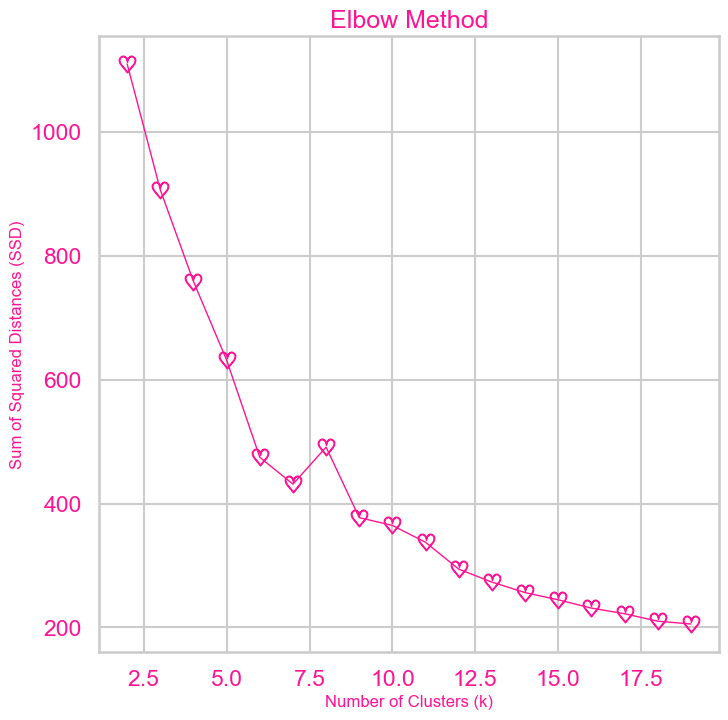

In [193]:
plot_ssd(k_range,ssd)

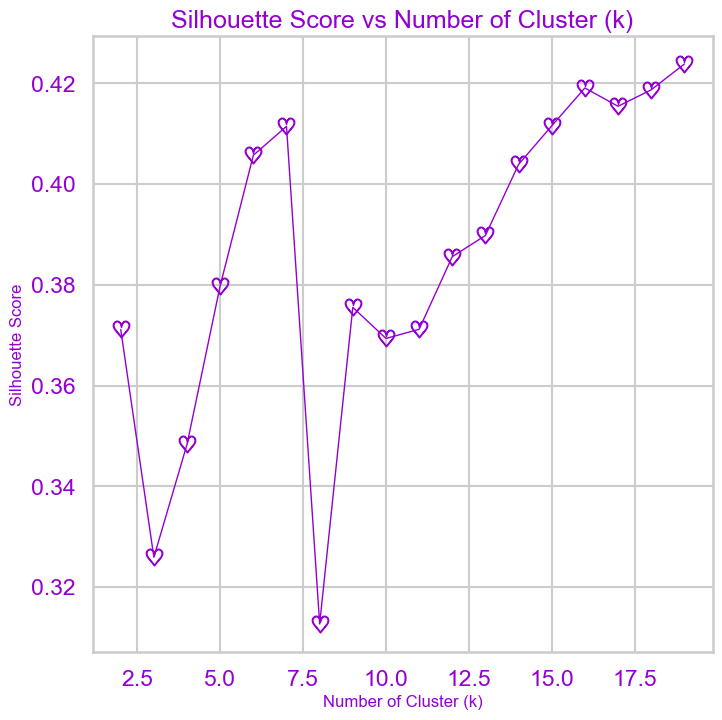

In [195]:
plot_silhouette(k_range,silhouette_scores,"Number of Cluster (k)")

### DBSCAN for Customer dataset

In [199]:
eps_values = np.linspace(0.1, 3, 50)
min_samples_values = np.arange(12,30) #I kept changing this 
models, best_eps, best_min_samples = dbscan(Customer_data_scaled,eps_values,min_samples_values) #This function loops over eps and min_samples creating a series of models

In [201]:
print(f"The best epsilon is {best_eps} and best minimum samples is {best_min_samples} according to silhouette score")

The best epsilon is 0.27755102040816326 and best minimum samples is 12 according to silhouette score


In [875]:
min_sample = 20
models_eps, silhouette_eps = dbscan_eps(Customer_data_scaled, eps_values, min_sample) #This function loops over only eps 

In [877]:
eps_value = 1.1
models_min_sample, silhouette_min_sample = dbscan_min_samples(Customer_data_scaled, min_samples_values, eps_value) #This function loops over only minimum samples 

In [880]:
test_eps = min(eps_values, key=lambda x: abs(x - eps_value))
test_model = models.get((test_eps, min_sample))
silhouette = silhouette_score(Customer_data_scaled, test_model.labels_)
print(f"The silhouette for this model is {silhouette}")

The silhouette for this model is 0.21174848545943148


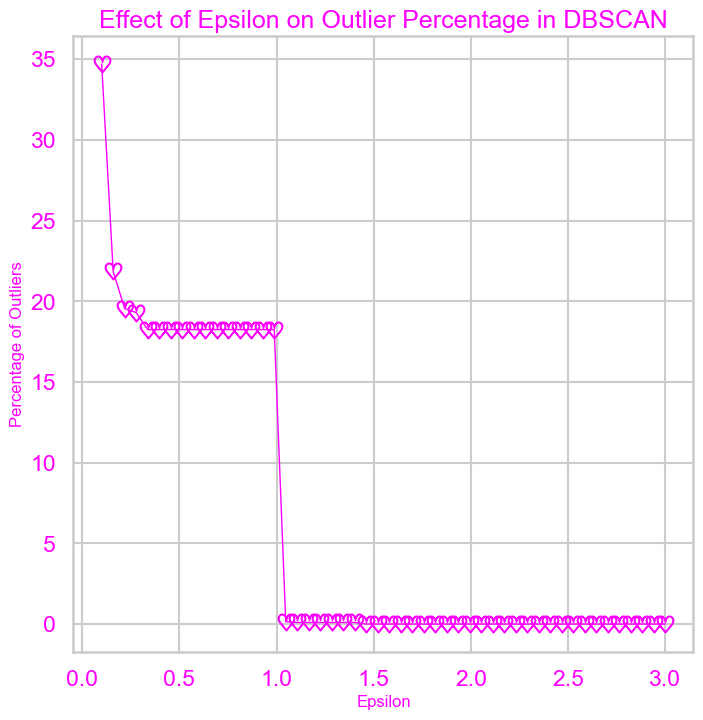

In [862]:
metricVSoutliers (Customer_data_scaled, eps_values, models_eps, xtitle="Epsilon")

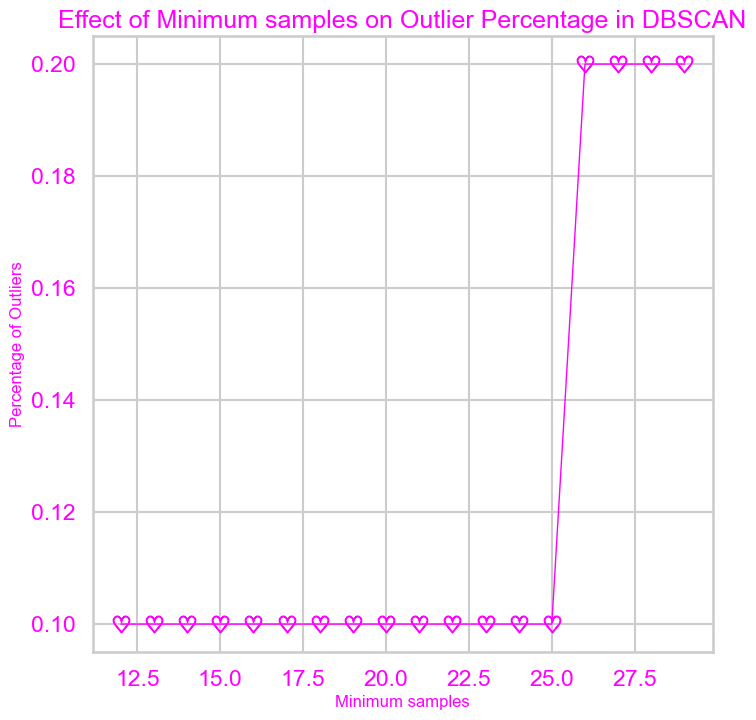

In [863]:
metricVSoutliers (Customer_data_scaled, min_samples_values, models_min_sample, xtitle="Minimum samples")

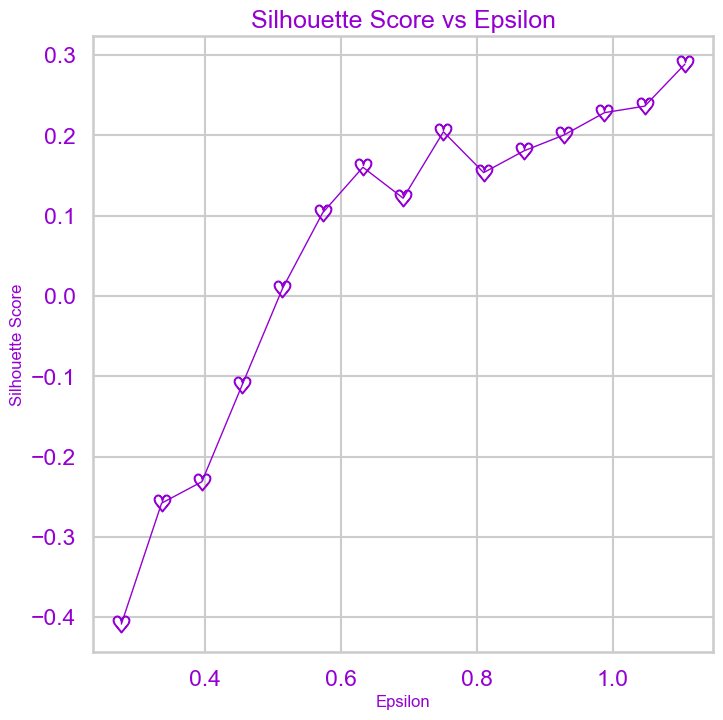

In [864]:
plot_silhouette(eps_values,silhouette_eps, "Epsilon")

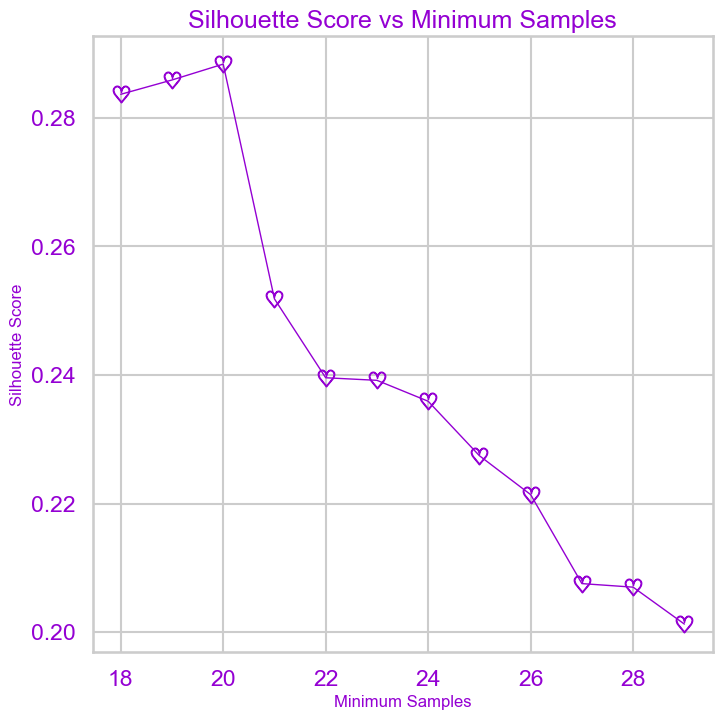

In [866]:
plot_silhouette(min_samples_values,silhouette_min_sample, "Minimum Samples")

### Hierarchical Clustering for Customer Dataset

In [809]:
affinities = ["euclidean"]
linkages = ["average"]
n_clusters = np.arange(2,20)

best_n, best_affinity, best_linkage, best_silhouette, silhouette_scores, models = hierarchical_clustering_n(Customer_data_scaled, affinities, linkages, n_clusters)

In [811]:
print(f"Best agglomerative clustering model for this data where number of clusters is {best_n} with linkage of {best_linkage} and affinity of {best_affinity}. "
      f"Silhouette Score is {best_silhouette}.")

Best agglomerative clustering model for this data where number of clusters is 7 with linkage of average and affinity of euclidean. Silhouette Score is 0.40985394699786126.


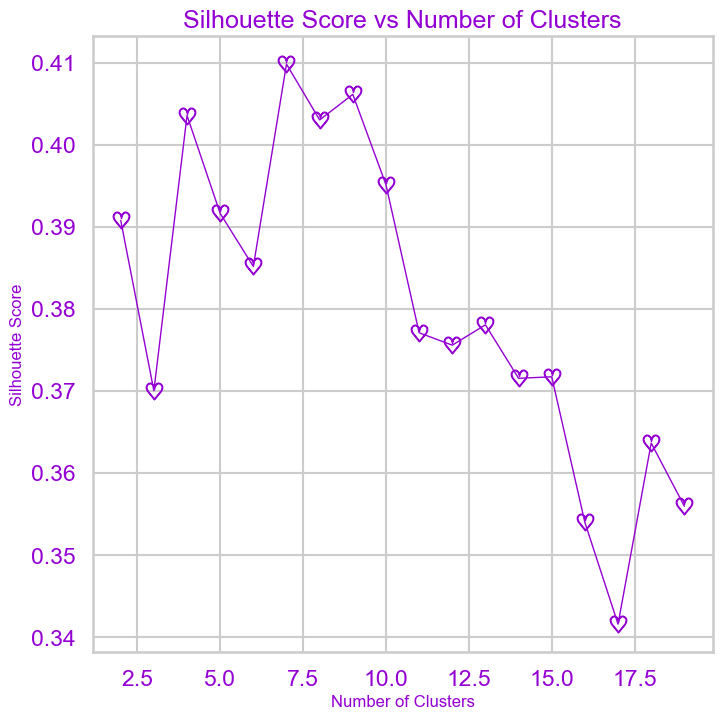

In [813]:
plot_silhouette(n_clusters,silhouette_scores, "Number of Clusters") #euclidean and average

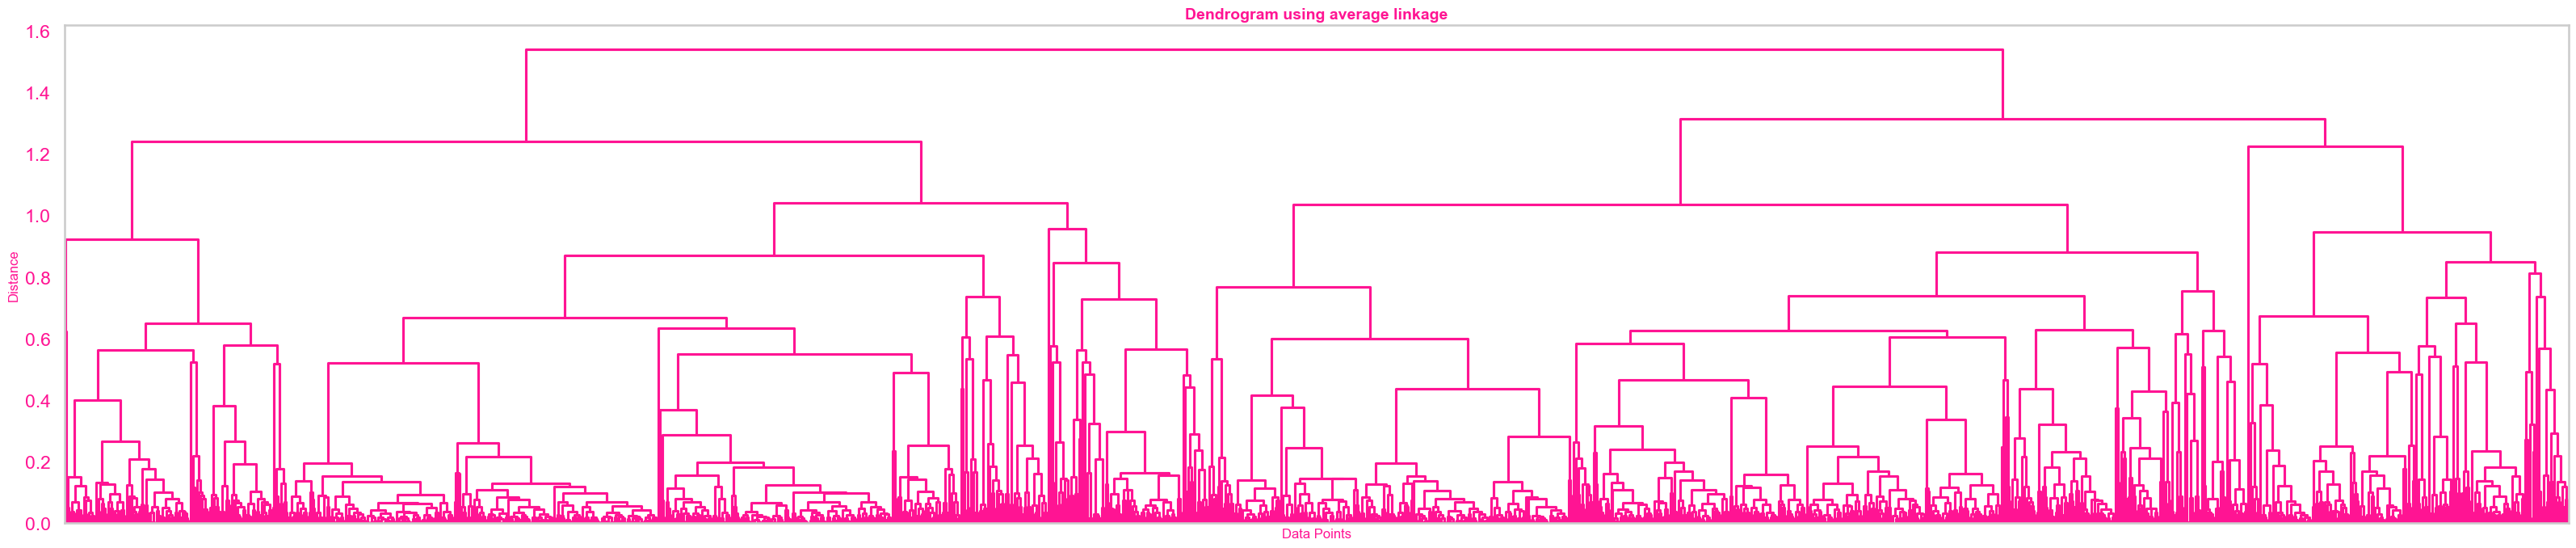

In [871]:
plot_dendrogram(Customer_data_scaled, "average")